# Customer Review Analysis for Leading Woman Clothing e-Commerce Company. 

In [2]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,SnowballStemmer, WordNetLemmatizer
import string
pd.options.mode.chained_assignment = None # this is for muting the warning wrt chained 
# assignments. The default value is Warn

%matplotlib inline

In [3]:
os.chdir('/Users/BackUp/AnalytixLabs/MachineLearning_TextMining/Assignmnts/15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform')
os.listdir()

['.DS_Store',
 'Womens Clothing Reviews Data-ForExcelLearning.xlsx',
 '15. Capstone Project - NLP - Woman Clothing E-Commerce Platform.pdf',
 'data.xlsx',
 '15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform.rar',
 'Womens Clothing Reviews Data.xlsx']

In [4]:
data = pd.read_excel('Womens Clothing Reviews Data.xlsx')
data.rename(columns = {'Product ID':'ProductID', 'Customer Age':'Age', 'Review Text':'Review',
                      'Recommend Flag':'Flag', 'Review Title':'Title','SubCategory2':'Subcategory2' }, 
            inplace = True)
data.head()

ProductID        Category Subcategory1 Subcategory2   Location Channel  \
0        767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1       1080         General      Dresses      Dresses  Bangalore  Mobile   
2       1077         General      Dresses      Dresses    Gurgaon  Mobile   
3       1049  General Petite      Bottoms        Pants    Chennai     Web   
4        847         General         Tops      Blouses  Bangalore     Web   

   Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                              Review  Rating  Flag  
0  Absolutely wonderful - silky and sexy and comf...       4     1  
1  Love this dress!  it's sooo pretty.  i happene...       5     1  
2  I had such high hopes for this dress and reall...       3     0  
3  I love, love, love this jumpsuit. it's fun, fl...       5     1  
4  This shirt is very flattering to all due to th...       5     1

In [5]:
data.info()
print('\n',data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     23486 non-null  int64 
 1   Category      23472 non-null  object
 2   Subcategory1  23472 non-null  object
 3   Subcategory2  23472 non-null  object
 4   Location      23486 non-null  object
 5   Channel       23486 non-null  object
 6   Age           23486 non-null  int64 
 7   Title         19676 non-null  object
 8   Review        22641 non-null  object
 9   Rating        23486 non-null  int64 
 10  Flag          23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB

 ProductID          0
Category          14
Subcategory1      14
Subcategory2      14
Location           0
Channel            0
Age                0
Title           3810
Review           845
Rating             0
Flag               0
dtype: int64


In [6]:
# filling the NA values in Category, SubCategory1 and Subcategory2 by using forward fill
# option of fillna method. 

data.fillna({'Category':data.Category.fillna(method = 'ffill'), 
            'Subcategory1':data.Subcategory1.fillna(method = 'ffill'),
            'Subcategory2':data.Subcategory2.fillna(method = 'ffill')}, inplace = True)
data.info()
print('\n',data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     23486 non-null  int64 
 1   Category      23486 non-null  object
 2   Subcategory1  23486 non-null  object
 3   Subcategory2  23486 non-null  object
 4   Location      23486 non-null  object
 5   Channel       23486 non-null  object
 6   Age           23486 non-null  int64 
 7   Title         19676 non-null  object
 8   Review        22641 non-null  object
 9   Rating        23486 non-null  int64 
 10  Flag          23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB

 ProductID          0
Category           0
Subcategory1       0
Subcategory2       0
Location           0
Channel            0
Age                0
Title           3810
Review           845
Rating             0
Flag               0
dtype: int64


# 1a. Performing exploratory analysis on the data to understand the patterns

    1. Products with maximum and minimum sales within each category and location
    2. Age Profile vis-a-vis type of products
    3. Product with maximum and minimum ratings
    4. Product likely and not likely to be recommended by majority of the customers
    5. Most and least preferred channel
    6. Product with max positive sentiment
    7. Product with min positive sentiment (or with highest negative sentiment)

#### Products with maximum and minimum sales within each category and location

In [7]:
# location vs subcategory1

loc_vs_sc1 = data.groupby(['Location', 'Subcategory1']).ProductID.count()
loc_vs_sc1 = pd.DataFrame(loc_vs_sc1).reset_index()
loc_vs_sc1.rename(columns = {'ProductID':'Count'}, inplace = True)
loc_vs_sc1.head(10)

Location Subcategory1  Count
0  Bangalore      Bottoms    854
1  Bangalore      Dresses   1362
2  Bangalore     Intimate    372
3  Bangalore      Jackets    224
4  Bangalore         Tops   2381
5  Bangalore        Trend     31
6    Chennai      Bottoms    367
7    Chennai      Dresses    613
8    Chennai     Intimate    172
9    Chennai      Jackets    105

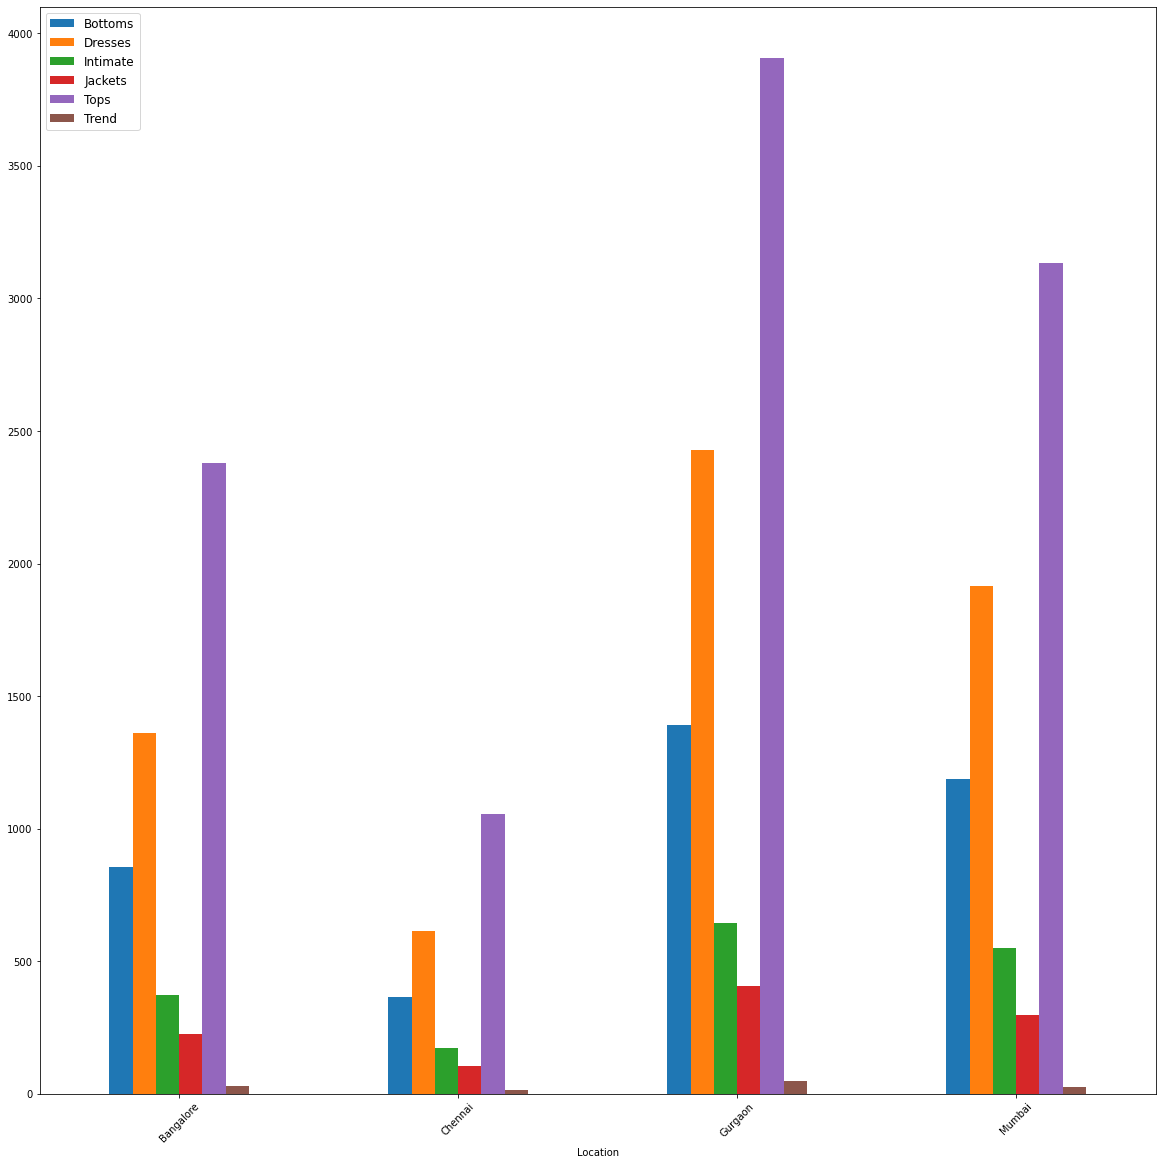

In [8]:
# location vs subcategory1

loc_vs_sc1_1 = pd.crosstab(index = data['Location'], columns = data['Subcategory1'], 
                           values = data['Subcategory1'],
                           aggfunc = 'count')
loc_vs_sc1_1.reset_index(inplace = True)
loc_vs_sc1_1.plot(x = 'Location', kind = 'bar', legend = True, figsize = (20,20))
plt.legend(loc = 'upper left', fontsize = 'large')
plt.xticks(rotation = 45)
plt.show()

1. Sales in Chennai is lowest for all subcategory items. 

2. Gurgaon has maximum sales in all subcategory items. 

3. Tops are the most sold items and Trend is the least sold item across all cities.

In [9]:
# location vs subcategory2 - via groupby

loc_vs_sc2 = data.groupby(['Location', 'Subcategory2']).ProductID.count()
loc_vs_sc2 = pd.DataFrame(loc_vs_sc2).reset_index()
loc_vs_sc2.rename(columns = {'ProductID':'Count'}, inplace = True)
loc_vs_sc2

Location    Subcategory2  Count
0   Bangalore         Blouses    664
1   Bangalore  Casual bottoms      1
2   Bangalore         Dresses   1362
3   Bangalore      Fine gauge    282
4   Bangalore       Intimates     27
..        ...             ...    ...
70     Mumbai          Skirts    316
71     Mumbai           Sleep     71
72     Mumbai        Sweaters    424
73     Mumbai            Swim    120
74     Mumbai           Trend     24

[75 rows x 3 columns]

In [10]:
# location vs subcategory2 - via pd.crosstab
pd.set_option('display.max_columns', None)
loc_vs_sc2_1 = pd.crosstab(index = data['Location'], columns = data['Subcategory2'])
loc_vs_sc2_1 = loc_vs_sc2_1.rename_axis(None, axis = 1).reset_index()
loc_vs_sc2_1

Location  Blouses  Casual bottoms  Chemises  Dresses  Fine gauge  \
0  Bangalore      664               1         0     1362         282   
1    Chennai      322               0         0      613         109   
2    Gurgaon     1142               0         0     2429         389   
3     Mumbai      973               1         1     1917         320   

   Intimates  Jackets  Jeans  Knits  Layering  Legwear  Lounge  Outerwear  \
0         27      147    259   1101        39       34     148         77   
1         16       71     94    467        11       10      75         34   
2         54      284    425   1861        44       64     278        121   
3         58      202    369   1416        52       57     191         97   

   Pants  Shorts  Skirts  Sleep  Sweaters  Swim  Trend  
0    317      80     197     46       334    78     31  
1    163      25      85     28       158    32     16  
2    504     115     347     83       513   120     48  
3    405      98     316     71       424   120     24

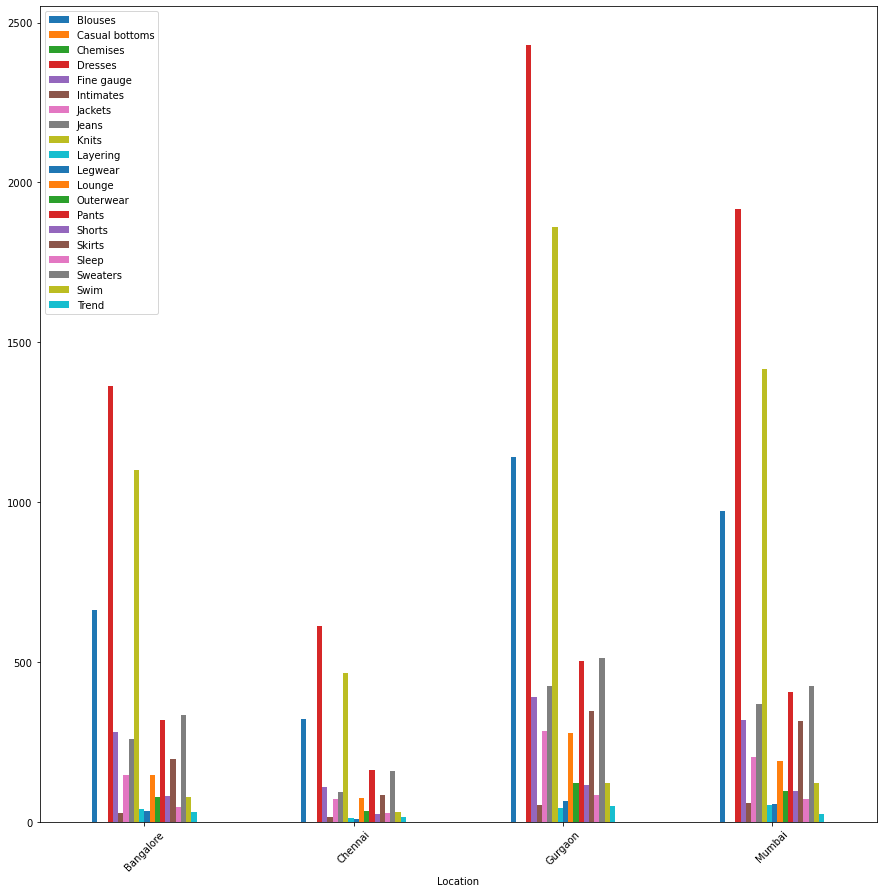

In [11]:
loc_vs_sc2_1.plot(x = 'Location', kind = 'bar', stacked = False, figsize = (15, 15))
plt.legend(loc = 'upper left', fontsize = 'medium')
plt.xticks(rotation = 45)
plt.show()

1. Sales for Casual Bottoms and Chemises is almost 0 across all cities. 
2. Chennai again has lowest of sales across all subcategory 2 items. 
3. Gurgaon again has maximum of sales across all subcategory2 items. 
4. Therefore company can give more push to the sales of Casual Bottoms and Chemises or completely stop their production. They may be out of fashion or victim of cylical fashion trends. 
5. Most of the sales are in double digits only. Very few items like dresses, Knits have 4 digit sales figures across cities. 
6. Layering and legwear have similar selling numbers (may be bought in pair). There can be attractive offers for  purchase of both. 
7. Difference between numbers of swim wear sold in Bangalore /Chennai and Gurgaon/ Mumbai is high. That can be due to more conservative scenario or paucity of swimming pools/ water parks in these cities. In either case, these items can be replaced by more suitable ones in Bangalore and Chennai. 

### Age Profile vis-a-vis type of products

In [12]:
cat_vs_age = data.groupby('Category').Age.median().round(2)
cat_vs_age

Category
General           41.0
General Petite    41.0
Initmates         39.0
Name: Age, dtype: float64

In [13]:
subcat1_vs_age = data.groupby('Subcategory1').Age.median().round(2)
subcat1_vs_age.to_frame()

Age
Subcategory1      
Bottoms       41.0
Dresses       40.0
Intimate      39.0
Jackets       42.0
Tops          42.0
Trend         43.0

In [14]:
subcat2_vs_age = data.groupby('Subcategory2').Age.median().round(2)
subcat2_vs_age.to_frame()

Age
Subcategory2        
Blouses         43.0
Casual bottoms  26.5
Chemises        38.0
Dresses         40.0
Fine gauge      43.0
Intimates       37.0
Jackets         42.0
Jeans           41.0
Knits           42.0
Layering        39.0
Legwear         39.0
Lounge          40.0
Outerwear       41.0
Pants           42.0
Shorts          39.0
Skirts          40.0
Sleep           41.0
Sweaters        43.0
Swim            36.0
Trend           43.0

In [15]:
pd.Series(subcat2_vs_age.values).median()

40.5

1. The median age of women buying across different categories is close to 40

2. The median age of women buying across different sub-categories-1 is close to 42

3. The median age of women buying across different sub-categories-2 is close to 40. Median age of women buying Casual Bottoms is 26 however number of these items sold are very less (almost negligible). 

4. The company has most of the clientale in mid-age women. Company can introduce plans/ schemes to target more younger generation while keeping their existing clientale of  women in 40s. 

### Product with maximum and minimum ratings

In [16]:
pd.set_option('display.max_rows', None)
prod_posreview = data.groupby(['Location', 'Subcategory2']).Rating.mean()
prod_posreview = prod_posreview.reset_index()
prod_posreview

Location    Subcategory2    Rating
0   Bangalore         Blouses  4.146084
1   Bangalore  Casual bottoms  5.000000
2   Bangalore         Dresses  4.138767
3   Bangalore      Fine gauge  4.276596
4   Bangalore       Intimates  4.037037
5   Bangalore         Jackets  4.312925
6   Bangalore           Jeans  4.297297
7   Bangalore           Knits  4.152589
8   Bangalore        Layering  4.256410
9   Bangalore         Legwear  4.205882
10  Bangalore          Lounge  4.364865
11  Bangalore       Outerwear  4.090909
12  Bangalore           Pants  4.223975
13  Bangalore          Shorts  4.275000
14  Bangalore          Skirts  4.324873
15  Bangalore           Sleep  4.195652
16  Bangalore        Sweaters  4.224551
17  Bangalore            Swim  4.089744
18  Bangalore           Trend  3.967742
19    Chennai         Blouses  4.142857
20    Chennai         Dresses  4.176183
21    Chennai      Fine gauge  4.183486
22    Chennai       Intimates  4.312500
23    Chennai         Jackets  4.380282
24    Chennai           Jeans  4.361702
25    Chennai           Knits  4.164882
26    Chennai        Layering  4.363636
27    Chennai         Legwear  4.000000
28    Chennai          Lounge  4.133333
29    Chennai       Outerwear  4.088235
30    Chennai           Pants  4.306748
31    Chennai          Shorts  4.080000
32    Chennai          Skirts  4.305882
33    Chennai           Sleep  4.357143
34    Chennai        Sweaters  4.189873
35    Chennai            Swim  4.593750
36    Chennai           Trend  3.562500
37    Gurgaon         Blouses  4.153240
38    Gurgaon         Dresses  4.128036
39    Gurgaon      Fine gauge  4.239075
40    Gurgaon       Intimates  4.296296
41    Gurgaon         Jackets  4.295775
42    Gurgaon           Jeans  4.383529
43    Gurgaon           Knits  4.181623
44    Gurgaon        Layering  4.386364
45    Gurgaon         Legwear  4.296875
46    Gurgaon          Lounge  4.287770
47    Gurgaon       Outerwear  4.198347
48    Gurgaon           Pants  4.230159
49    Gurgaon          Shorts  4.339130
50    Gurgaon          Skirts  4.152738
51    Gurgaon           Sleep  4.457831
52    Gurgaon        Sweaters  4.222222
53    Gurgaon            Swim  4.175000
54    Gurgaon           Trend  3.833333
55     Mumbai         Blouses  4.167523
56     Mumbai  Casual bottoms  4.000000
57     Mumbai        Chemises  4.000000
58     Mumbai         Dresses  4.181012
59     Mumbai      Fine gauge  4.300000
60     Mumbai       Intimates  4.379310
61     Mumbai         Jackets  4.252475
62     Mumbai           Jeans  4.379404
63     Mumbai           Knits  4.142655
64     Mumbai        Layering  4.461538
65     Mumbai         Legwear  4.350877
66     Mumbai          Lounge  4.340314
67     Mumbai       Outerwear  4.329897
68     Mumbai           Pants  4.328395
69     Mumbai          Shorts  4.193878
70     Mumbai          Skirts  4.281646
71     Mumbai           Sleep  4.112676
72     Mumbai        Sweaters  4.089623
73     Mumbai            Swim  4.183333
74     Mumbai           Trend  3.750000

1. All the products in Sub-Category 2 are having good ratings however, Trend has average rating across all cities. 

In [17]:
# product with max rating among all the cities

for loc in prod_posreview.Location.unique():
    prod = prod_posreview.loc[prod_posreview.Location == loc,]
    maxrate = prod.loc[prod.Rating == prod.Rating.max(),]
    print(maxrate, '\n' )

    Location    Subcategory2  Rating
1  Bangalore  Casual bottoms     5.0 

   Location Subcategory2   Rating
35  Chennai         Swim  4.59375 

   Location Subcategory2    Rating
51  Gurgaon        Sleep  4.457831 

   Location Subcategory2    Rating
64   Mumbai     Layering  4.461538 



Although Chennai has least number of swimwear sold, it has highest rating for it among all the items in the sub-category2 product list. 

In [18]:
# product with min positive rating among all the cities

for loc in prod_posreview.Location.unique():
    prod = prod_posreview.loc[prod_posreview.Location == loc,]
    maxrate = prod.loc[prod.Rating == prod.Rating.min(),]
    print(maxrate, '\n' )

     Location Subcategory2    Rating
18  Bangalore        Trend  3.967742 

   Location Subcategory2  Rating
36  Chennai        Trend  3.5625 

   Location Subcategory2    Rating
54  Gurgaon        Trend  3.833333 

   Location Subcategory2  Rating
74   Mumbai        Trend    3.75 



### Product likely and not likely to be recommended by majority of the customers

In [19]:
prod_likely = data.groupby(['Location', 'Subcategory2']).Flag.sum()
prod_likely = prod_likely.reset_index()
prod_likely

Location    Subcategory2  Flag
0   Bangalore         Blouses   534
1   Bangalore  Casual bottoms     1
2   Bangalore         Dresses  1096
3   Bangalore      Fine gauge   231
4   Bangalore       Intimates    20
5   Bangalore         Jackets   125
6   Bangalore           Jeans   227
7   Bangalore           Knits   898
8   Bangalore        Layering    35
9   Bangalore         Legwear    30
10  Bangalore          Lounge   133
11  Bangalore       Outerwear    59
12  Bangalore           Pants   263
13  Bangalore          Shorts    70
14  Bangalore          Skirts   171
15  Bangalore           Sleep    39
16  Bangalore        Sweaters   275
17  Bangalore            Swim    61
18  Bangalore           Trend    25
19    Chennai         Blouses   259
20    Chennai         Dresses   507
21    Chennai      Fine gauge    94
22    Chennai       Intimates    14
23    Chennai         Jackets    63
24    Chennai           Jeans    82
25    Chennai           Knits   383
26    Chennai        Layering     9
27    Chennai         Legwear     7
28    Chennai          Lounge    59
29    Chennai       Outerwear    26
30    Chennai           Pants   135
31    Chennai          Shorts    20
32    Chennai          Skirts    74
33    Chennai           Sleep    25
34    Chennai        Sweaters   125
35    Chennai            Swim    30
36    Chennai           Trend    12
37    Gurgaon         Blouses   933
38    Gurgaon         Dresses  1953
39    Gurgaon      Fine gauge   325
40    Gurgaon       Intimates    45
41    Gurgaon         Jackets   240
42    Gurgaon           Jeans   382
43    Gurgaon           Knits  1522
44    Gurgaon        Layering    37
45    Gurgaon         Legwear    54
46    Gurgaon          Lounge   240
47    Gurgaon       Outerwear   102
48    Gurgaon           Pants   418
49    Gurgaon          Shorts    98
50    Gurgaon          Skirts   284
51    Gurgaon           Sleep    75
52    Gurgaon        Sweaters   409
53    Gurgaon            Swim    94
54    Gurgaon           Trend    35
55     Mumbai         Blouses   787
56     Mumbai  Casual bottoms     1
57     Mumbai        Chemises     1
58     Mumbai         Dresses  1553
59     Mumbai      Fine gauge   271
60     Mumbai       Intimates    54
61     Mumbai         Jackets   167
62     Mumbai           Jeans   320
63     Mumbai           Knits  1159
64     Mumbai        Layering    48
65     Mumbai         Legwear    51
66     Mumbai          Lounge   163
67     Mumbai       Outerwear    82
68     Mumbai           Pants   341
69     Mumbai          Shorts    79
70     Mumbai          Skirts   270
71     Mumbai           Sleep    56
72     Mumbai        Sweaters   335
73     Mumbai            Swim    97
74     Mumbai           Trend    16

In [20]:
# product in each city most likely to be recommended

for loc in prod_likely.Location.unique():
    prod = prod_likely.loc[prod_likely.Location == loc,]
    maxrate = prod.loc[prod.Flag == prod.Flag.max(),]
    print(maxrate, '\n' )

    Location Subcategory2  Flag
2  Bangalore      Dresses  1096 

   Location Subcategory2  Flag
20  Chennai      Dresses   507 

   Location Subcategory2  Flag
38  Gurgaon      Dresses  1953 

   Location Subcategory2  Flag
58   Mumbai      Dresses  1553 



Dresses are most likely to be recommended by all the customers across all cities. 

In [21]:
# product in each city least likely to be recommended

for loc in prod_likely.Location.unique():
    prod = prod_likely.loc[prod_likely.Location == loc,]
    minrate = prod.loc[prod.Flag == prod.Flag.min(),]
    print(minrate, '\n' )

    Location    Subcategory2  Flag
1  Bangalore  Casual bottoms     1 

   Location Subcategory2  Flag
27  Chennai      Legwear     7 

   Location Subcategory2  Flag
54  Gurgaon        Trend    35 

   Location    Subcategory2  Flag
56   Mumbai  Casual bottoms     1
57   Mumbai        Chemises     1 



1. Casual Bottoms are likely to be least recommended in both Bangalore and Mumbai. 
2. Chemises are also likely to be least recommended in Mumbai. 
3. Legwear are likely to be least recommended in Chennai. 

### Most and Least Preferred Channels

In [22]:
chan = data.groupby(['Location','Subcategory2','Channel']).ProductID.count()
chan = chan.reset_index()
chan.head(10)

Location    Subcategory2 Channel  ProductID
0  Bangalore         Blouses  Mobile        272
1  Bangalore         Blouses     Web        392
2  Bangalore  Casual bottoms     Web          1
3  Bangalore         Dresses  Mobile        545
4  Bangalore         Dresses     Web        817
5  Bangalore      Fine gauge  Mobile        110
6  Bangalore      Fine gauge     Web        172
7  Bangalore       Intimates  Mobile         13
8  Bangalore       Intimates     Web         14
9  Bangalore         Jackets  Mobile         76

In most of the products in sub-category2 preferred channel is web across all cities. This may indicate that the mobile app use of the company is low. 

# 1b. Perform text mining task to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive and negative reviews separately. 

### Product with max positive sentiment

In [23]:
reviews = pd.Series(data.Review)
reviews.isna().sum()

845

### Replacing all NaN values with 'Blank Review' text - to maintain the length of series for concatenating with dataframe later on. 

In [24]:
reviews = reviews.replace(np.NaN,'Blank Review')
reviews.isna().sum()

0

### Step 1 - lowercase all the words

In [25]:
reviews = reviews.str.lower()
reviews.head()

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: Review, dtype: object

### Step 2 - Remove all special characters

In [26]:
import re

cleaned_reviews = []
for review in reviews:
    review = re.sub(r'[^a-z \t]','',review)
    # compile a pattern to remove occurence of a letter more than 2 times
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL) 
    review = pattern.sub(r"\1", review)
    cleaned_reviews.append(review)

cleaned_reviews[0:5]

['absolutely wonderful  silky and sexy and comfortable',
 'love this dress  its so pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite',
 'i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c',
 'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments',
 'this shirt is very flattering to all due 

### Step 3 - Remove all stop words

In [27]:
cleaned_reviews_no_sw = []

# for review in cleaned_reviews:
#     lst = []
#     review = word_tokenize(review)
#     for token in review:
#         if token not in stopwords.words('english'):
#             lst.append(token)
#     cleaned_reviews_1.append(' '.join(lst))

# alternate method

for review in cleaned_reviews:
    lst = []
    lst = [token for token in word_tokenize(review) if token not in stopwords.words('english')]
    cleaned_reviews_no_sw.append(' '.join(lst))

cleaned_reviews_no_sw[0:5]

['absolutely wonderful silky sexy comfortable',
 'love dress pretty happened find store im glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite',
 'high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments',
 'shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt']

### Lemmatization or Stemming (Stemming is more faster as compared to Lemmatization)

Both lemmatization and Stemming are used to derive root form of the word. However, lemmatization produces a proper word while stemmer may or may not. Lemmatization uses corpus from stopwords and Wordnet corpus to produce actual words while stemmer just outputs the root word. In lemmatization, parts of speech are also required to be tagged to produce actual words. For speed requirements, stemming is preferred as lemmatization will scan stopwords and wordnet corpus for actual words. However, if language is important while building language based applications, then lemmatization is to be used which will scan entire corpus of stopwords, wordnet corpus and parts of speech tagging to produce proper words. 

In [28]:
# stemming the corpus of reviews

lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

cleaned_reviews_lemma = []

for review in cleaned_reviews_no_sw:
    lst = []
    tokens = word_tokenize(review)
    lst = [lemmatizer.lemmatize(token) for token in tokens]
    cleaned_reviews_lemma.append(' '.join(lst))

cleaned_reviews_lemma[0:5]

['absolutely wonderful silky sexy comfortable',
 'love dress pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt']

In [29]:
# # udf for performing text cleaning

# stop = stopwords.words('english')
# punc = string.punctuation
# lemma = WordNetLemmatizer()

# def clean_doc(doc):
#     stop_free = ' '.join([word for word in word_tokenize(doc) if word not in stop])
#     punc_free = ''.join([char for char in stop_free if char not in punc])
#     cleaned_text = ' '.join([lemma.lemmatize(word) for word in word_tokenize(punc_free)])
#     return cleaned_text

# final_doc = [clean_doc(doc) for doc in list(reviews)]

# # Another method for removal of punctuation from the string

# import string
# a_string = 'Th??/is is. a sa,,..\mple !!str@ing'

# a_string = a_string.translate(str.maketrans('','',string.punctuation))
# a_string

### Correct Spelling/ Typos

In [30]:
# correction of spellings after stemming

# cleaned_reviews_no_typos = []

# for review in cleaned_reviews_stem:
#     lst = []
#     tokens = word_tokenize(review)
#     for token in tokens:
#         tb = TextBlob(token)
#         lst.append(tb.correct().raw)
#     cleaned_reviews_no_typos.append(' '.join(lst))
    
# cleaned_reviews_no_typos[0:5]

### Tagging Parts of Speech and selecting only adverbs, adjectives and other qualifying words

In [31]:
import nltk

cleaned_reviews_pos = []

for review in cleaned_reviews_lemma:
    tokens = word_tokenize(review)
    pos_tags = nltk.pos_tag(tokens)
    req_words = [tag[0] for tag in pos_tags if tag[1] in ["JJ","JJR","JJS","RB","RBR","RBS","UH"]]
    cleaned_reviews_pos.append(' '.join(req_words))
    
cleaned_reviews_pos[0:5]

['absolutely wonderful silky comfortable',
 'pretty find never online petite little definitely true truly petite',
 'high really initially petite small usual outrageously small small petite ok overall top comfortable fit nicely bottom tight layer several somewhat cheap net major directly',
 'fabulous wear great',
 'due adjustable perfect well cardigan']

### Polarity score and sentiment of the reviews

In [32]:
# Polarity score and sentiment have been done on reviews since cleaning, removing stopwords, 
# lemmatization and tagging PoS is resulting in wrong sentiment classifications for the
# reviews
    
polarity_score = []

for review in reviews:   
    tb = TextBlob(review)
    polarity_score.append(round(tb.polarity,4))

sentiment = [('Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')) for score in polarity_score]


In [33]:
data = pd.concat((data, pd.Series(polarity_score), pd.Series(sentiment)), axis = 1)
data.rename(columns = {0:'Polarity_Score',1:'Sentiment'}, inplace = True)
data.to_excel('data.xlsx')
data.head(5)

ProductID        Category Subcategory1 Subcategory2   Location Channel  \
0        767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1       1080         General      Dresses      Dresses  Bangalore  Mobile   
2       1077         General      Dresses      Dresses    Gurgaon  Mobile   
3       1049  General Petite      Bottoms        Pants    Chennai     Web   
4        847         General         Tops      Blouses  Bangalore     Web   

   Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                              Review  Rating  Flag  \
0  Absolutely wonderful - silky and sexy and comf...       4     1   
1  Love this dress!  it's sooo pretty.  i happene...       5     1   
2  I had such high hopes for this dress and reall...       3     0   
3  I love, love, love this jumpsuit. it's fun, fl...       5     1   
4  This shirt is very flattering to all due to th...       5     1   

   Polarity_Score Sentiment  
0          0.6333  Positive  
1          0.3396  Positive  
2          0.0737  Positive  
3          0.5500  Positive  
4          0.5129  Positive

### Word Cloud

In [34]:
total_reviews = pd.concat((pd.Series(cleaned_reviews_pos), data['Polarity_Score'], data['Sentiment']), axis = 1)
total_reviews.rename(columns = {0:'Reviews'}, inplace = True)
total_reviews.head()

Reviews  Polarity_Score Sentiment
0             absolutely wonderful silky comfortable          0.6333  Positive
1  pretty find never online petite little definit...          0.3396  Positive
2  high really initially petite small usual outra...          0.0737  Positive
3                                fabulous wear great          0.5500  Positive
4               due adjustable perfect well cardigan          0.5129  Positive

In [35]:
# create bag of words with unique words

combined_words = []

for review in cleaned_reviews_pos:
    tokens = word_tokenize(review)
    combined_words.extend(tokens)

combined_words[0:10]

['absolutely',
 'wonderful',
 'silky',
 'comfortable',
 'pretty',
 'find',
 'never',
 'online',
 'petite',
 'little']

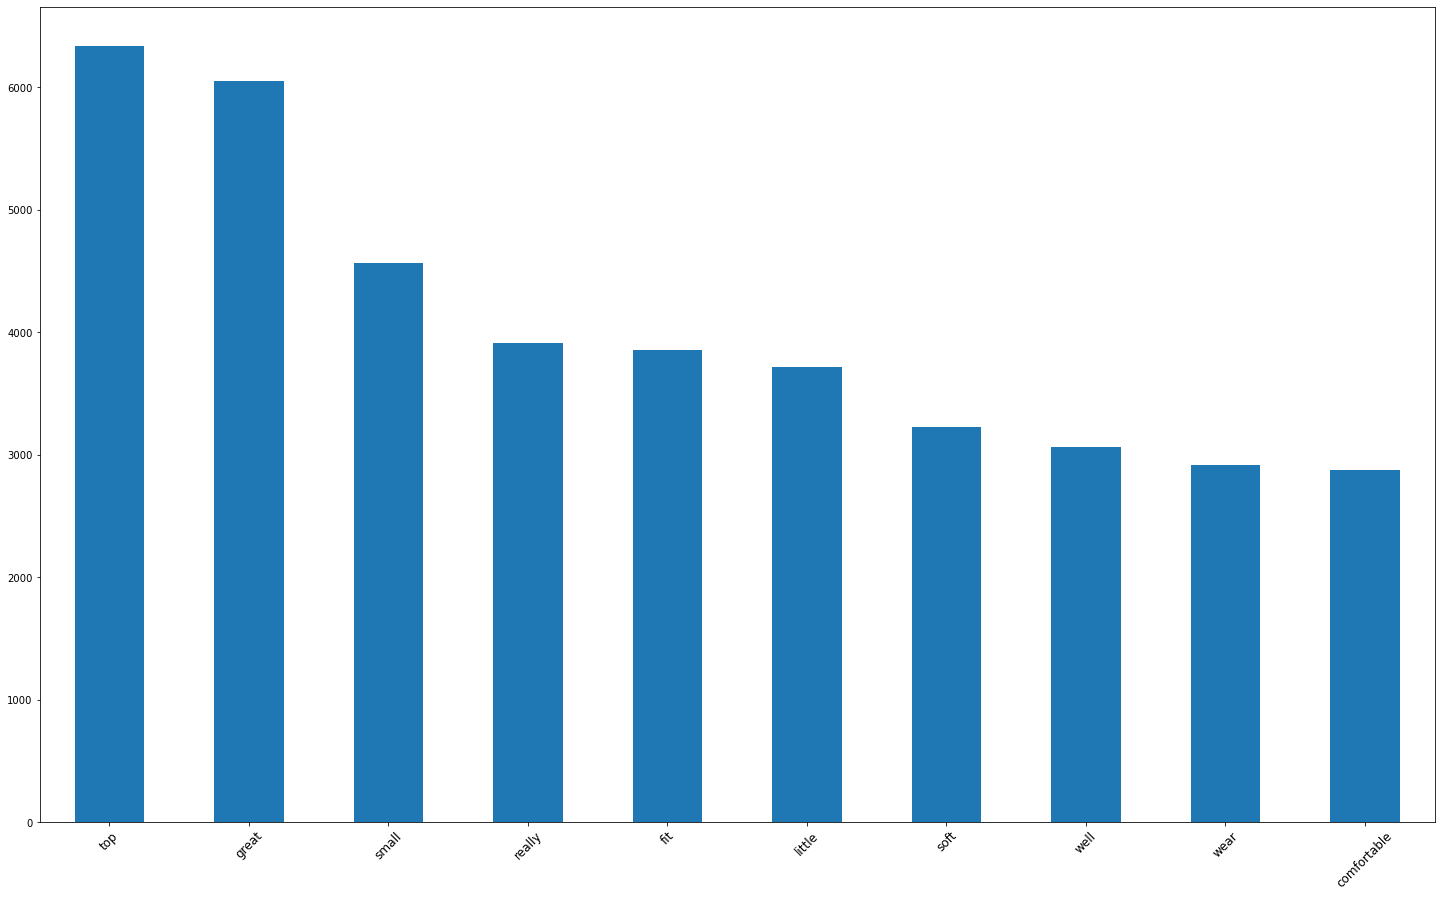

In [36]:
pd.set_option('display.max_rows', None)
combined_words = pd.Series(combined_words)
word_count = combined_words.value_counts().sort_values(ascending = False)
word_count[word_count >= 200][:10].plot(kind = 'bar', figsize = (25, 15))
plt.xticks(rotation = '45', size = 'large')
plt.show()

In [37]:
top_50 = ' '.join(list(word_count[:50].index))
print(top_50)

top great small really fit little soft well wear comfortable nice back large much also long perfect beautiful fabric short even usually pretty good big petite still black true im right however white dress perfectly enough definitely first jean cute better many loose super regular lovely high pant gorgeous casual


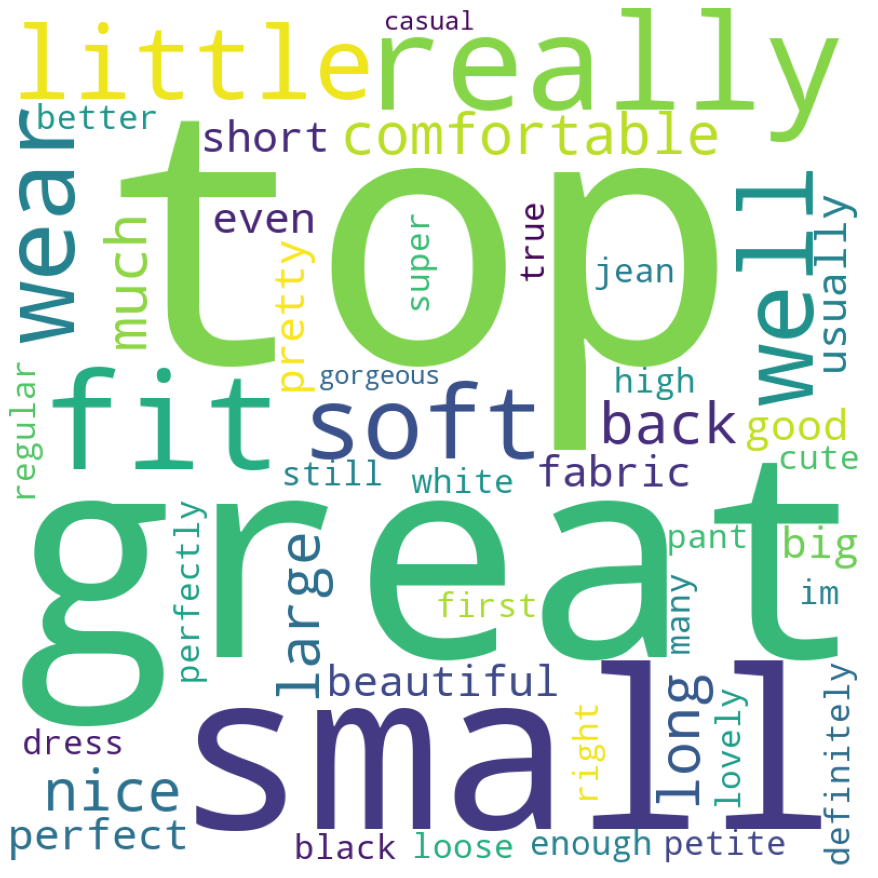

In [38]:
from wordcloud import WordCloud
word_cloud = WordCloud(background_color = 'white',width = 800, height = 800, min_font_size = 10).generate(top_50)
plt.figure(figsize=(12, 12), facecolor = None)
plt.axis('off')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

## Word Cloud for both Positive and Negative Reviews

## Word Cloud for Positive Review

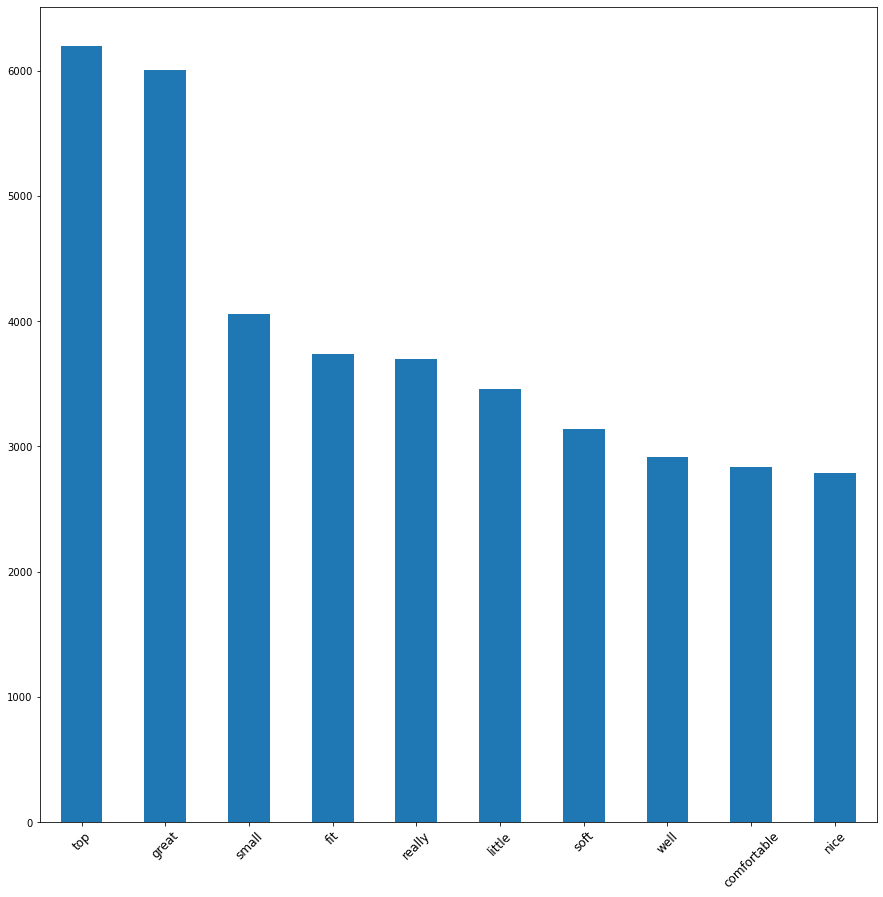

In [39]:
pos_reviews = total_reviews.loc[total_reviews.Sentiment == 'Positive', 'Reviews']

combined_words = []
for element in pos_reviews:
    tokens = word_tokenize(element)
    combined_words.extend(tokens)
    
combined_words = pd.Series(combined_words)
word_count = combined_words.value_counts().sort_values(ascending = False)

word_count_max = word_count[word_count >= 1000]
top_words = ' '.join(list(word_count_max.index))

word_count_max[:10].plot(kind = 'bar', figsize = (15,15))
plt.xticks(rotation = '45', size = 'large')
plt.show()

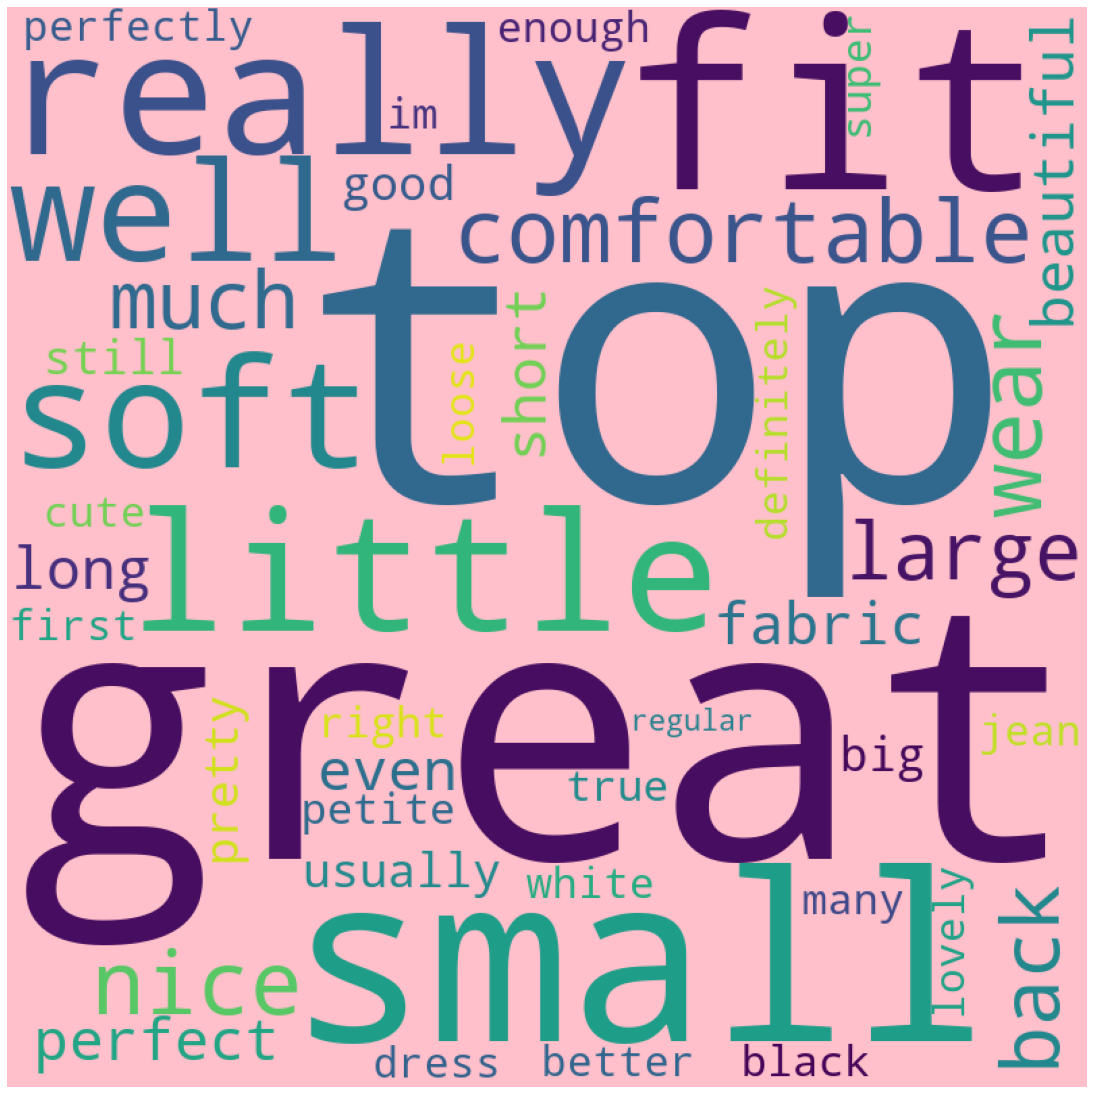

In [40]:
word_cloud = WordCloud(background_color = 'pink', width = 800, height = 800).generate(top_words)
plt.figure(facecolor=None, figsize = (15,15))
plt.axis('off')
plt.imshow(word_cloud)
plt.tight_layout(pad = 0)
plt.show()

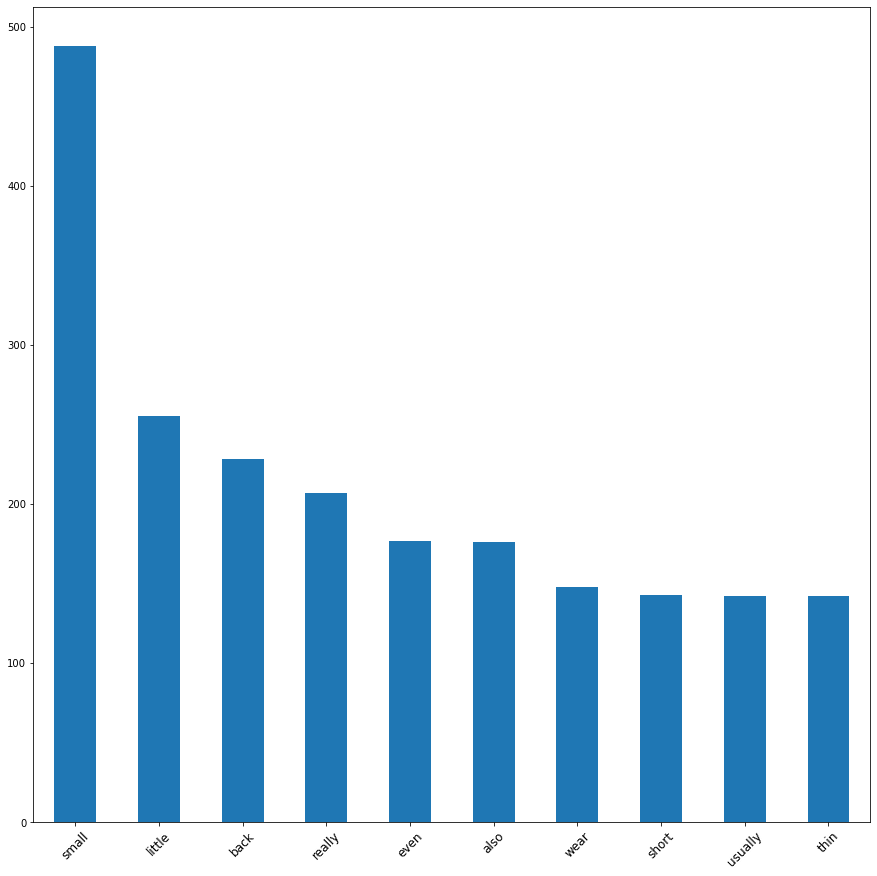

In [41]:
neg_reviews = total_reviews.loc[total_reviews.Sentiment == 'Negative', 'Reviews']

combined_words = []
for element in neg_reviews:
    tokens = word_tokenize(element)
    combined_words.extend(tokens)
    
combined_words = pd.Series(combined_words)
word_count = combined_words.value_counts().sort_values(ascending = False)

word_count_max = word_count[word_count >= 60]
top_words = ' '.join(list(word_count_max.index))

word_count_max[:10].plot(kind = 'bar', figsize = (15,15))
plt.xticks(rotation = '45', size = 'large')
plt.show()

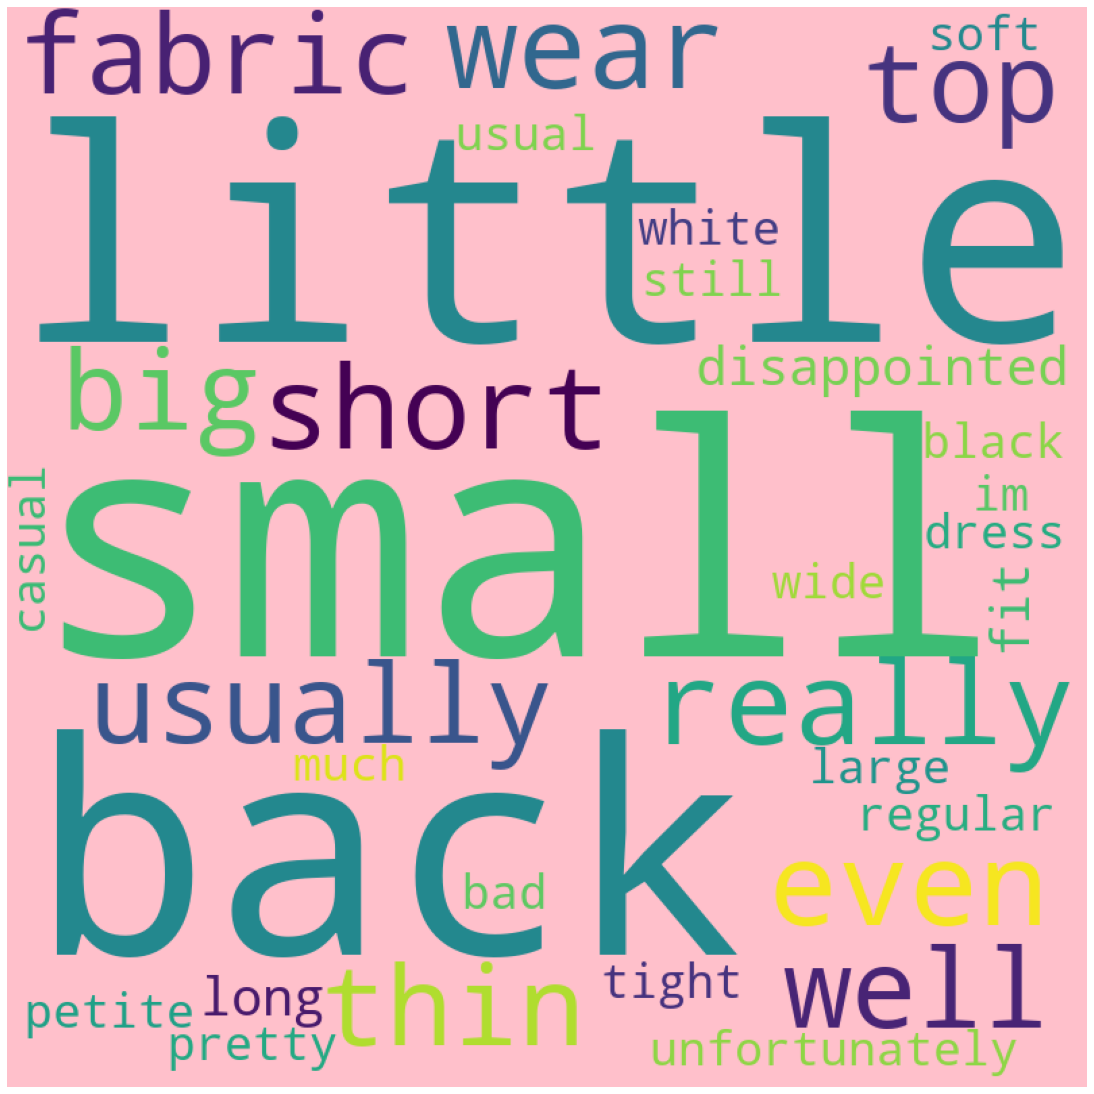

In [42]:
word_cloud = WordCloud(background_color='pink', width = 800, height = 800).generate(top_words)
plt.figure(facecolor=None, figsize = (15,15))
plt.axis('off')
plt.imshow(word_cloud)
plt.tight_layout(pad = 0)
plt.show()

# 1c. Understand sentiment among the customers on the different categories, sub-categories, products by location and age group. 

### Sentiment among the customers on different categories by location

In [43]:
sent_cat = data.groupby(['Category','Location','Sentiment']).Sentiment.count()
df = pd.DataFrame(sent_cat)
df.columns = ['Value']
df.reset_index(inplace = True)
df

Category   Location Sentiment  Value
0          General  Bangalore  Negative    170
1          General  Bangalore   Neutral    124
2          General  Bangalore  Positive   2828
3          General    Chennai  Negative     75
4          General    Chennai   Neutral     59
5          General    Chennai  Positive   1235
6          General    Gurgaon  Negative    313
7          General    Gurgaon   Neutral    207
8          General    Gurgaon  Positive   4683
9          General     Mumbai  Negative    236
10         General     Mumbai   Neutral    156
11         General     Mumbai  Positive   3773
12  General Petite  Bangalore  Negative    102
13  General Petite  Bangalore   Neutral     62
14  General Petite  Bangalore  Positive   1612
15  General Petite    Chennai  Negative     55
16  General Petite    Chennai   Neutral     33
17  General Petite    Chennai  Positive    731
18  General Petite    Gurgaon  Negative    168
19  General Petite    Gurgaon   Neutral    127
20  General Petite    Gurgaon  Positive   2775
21  General Petite     Mumbai  Negative    102
22  General Petite     Mumbai   Neutral     95
23  General Petite     Mumbai  Positive   2262
24       Initmates  Bangalore  Negative     27
25       Initmates  Bangalore   Neutral     13
26       Initmates  Bangalore  Positive    286
27       Initmates    Chennai  Negative      7
28       Initmates    Chennai   Neutral      5
29       Initmates    Chennai  Positive    129
30       Initmates    Gurgaon  Negative     34
31       Initmates    Gurgaon   Neutral     34
32       Initmates    Gurgaon  Positive    480
33       Initmates     Mumbai  Negative     23
34       Initmates     Mumbai   Neutral     36
35       Initmates     Mumbai  Positive    429

In [44]:
summary = df.pivot(index = ['Category','Location'], columns = 'Sentiment', values = 'Value')
summary

Sentiment                 Negative  Neutral  Positive
Category       Location                              
General        Bangalore       170      124      2828
               Chennai          75       59      1235
               Gurgaon         313      207      4683
               Mumbai          236      156      3773
General Petite Bangalore       102       62      1612
               Chennai          55       33       731
               Gurgaon         168      127      2775
               Mumbai          102       95      2262
Initmates      Bangalore        27       13       286
               Chennai           7        5       129
               Gurgaon          34       34       480
               Mumbai           23       36       429

In [45]:
# getting the percentages of each cell

summary[['Negative','Neutral','Positive']].apply(lambda x : x / summary.sum(axis = 1)).round(3)*100
# summary.iloc[:, 0:].apply(lambda x: x.div(x.sum()).mul(100), axis=1).astype(int)

Sentiment                 Negative  Neutral  Positive
Category       Location                              
General        Bangalore       5.4      4.0      90.6
               Chennai         5.5      4.3      90.2
               Gurgaon         6.0      4.0      90.0
               Mumbai          5.7      3.7      90.6
General Petite Bangalore       5.7      3.5      90.8
               Chennai         6.7      4.0      89.3
               Gurgaon         5.5      4.1      90.4
               Mumbai          4.1      3.9      92.0
Initmates      Bangalore       8.3      4.0      87.7
               Chennai         5.0      3.5      91.5
               Gurgaon         6.2      6.2      87.6
               Mumbai          4.7      7.4      87.9

Positive sentiment for all the three categories remains the highest for all locations. All three categories have the lowest Neutral sentiment among all the cities. All the categories have more or less similar rating among all the cities. For example, negative review for all categories among all cities generally lie in the range 9 - 11, however there is one outlier - Intimates in Bangalore. Same is true for the positive reviews as well. Here the positive review for Intimates in Bangalore has dropped significantly from the normal range. 

### Sentiment among the customers on different sub-categories1 by location

In [46]:
sent_subcat1 = data.groupby(['Subcategory1','Location','Sentiment']).Sentiment.count()
df = pd.DataFrame(sent_subcat1)
df.columns = ['Value']
df.reset_index(inplace = True)
df.head(10)

Subcategory1   Location Sentiment  Value
0      Bottoms  Bangalore  Negative     46
1      Bottoms  Bangalore   Neutral     28
2      Bottoms  Bangalore  Positive    780
3      Bottoms    Chennai  Negative     25
4      Bottoms    Chennai   Neutral     13
5      Bottoms    Chennai  Positive    329
6      Bottoms    Gurgaon  Negative     94
7      Bottoms    Gurgaon   Neutral     62
8      Bottoms    Gurgaon  Positive   1235
9      Bottoms     Mumbai  Negative     50

In [47]:
summary = df.pivot(index = ['Subcategory1','Location'], columns = 'Sentiment', values = 'Value')
summary[['Negative','Neutral','Positive']].apply(lambda x : x / summary.sum(axis = 1)).round(3)*100

# following method will not work if there are NAN values in the data
# summary.iloc[:, 0:].apply(lambda x: x.div(x.sum()).mul(100), axis=1).astype(int) 

Sentiment               Negative  Neutral  Positive
Subcategory1 Location                              
Bottoms      Bangalore       5.4      3.3      91.3
             Chennai         6.8      3.5      89.6
             Gurgaon         6.8      4.5      88.8
             Mumbai          4.2      3.9      91.9
Dresses      Bangalore       5.9      2.7      91.4
             Chennai         6.0      2.6      91.4
             Gurgaon         5.9      3.4      90.7
             Mumbai          5.3      3.5      91.2
Intimate     Bangalore       8.3      4.3      87.4
             Chennai         5.8      4.1      90.1
             Gurgaon         6.1      5.8      88.2
             Mumbai          4.9      6.9      88.2
Jackets      Bangalore       7.1      2.7      90.2
             Chennai         7.6      4.8      87.6
             Gurgaon         7.2      3.5      89.4
             Mumbai          5.0      3.3      91.6
Tops         Bangalore       5.1      4.7      90.2
             Chennai         5.3      5.2      89.5
             Gurgaon         5.3      4.4      90.3
             Mumbai          5.2      4.0      90.8
Trend        Bangalore      16.1      NaN      83.9
             Chennai         6.2      6.2      87.5
             Gurgaon         6.2      NaN      93.8
             Mumbai         16.7      NaN      83.3

All the products in subcategory 1 have highest of positive reviews. Trend has the highest of negative among all the negative reviews. Trend in Bangalore tops the list with maximum of negative reviews. 

### Sentiment among the customers on different sub-categories2 by location

In [48]:
sent_subcat2 = data.groupby(['Subcategory2','Location','Sentiment']).Sentiment.count()
df = pd.DataFrame(sent_subcat2)
df.columns = ['Value']
df.reset_index(inplace = True)
df.head()

Subcategory2   Location Sentiment  Value
0      Blouses  Bangalore  Negative     34
1      Blouses  Bangalore   Neutral     31
2      Blouses  Bangalore  Positive    599
3      Blouses    Chennai  Negative     16
4      Blouses    Chennai   Neutral     14

/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x720 with 0 Axes>

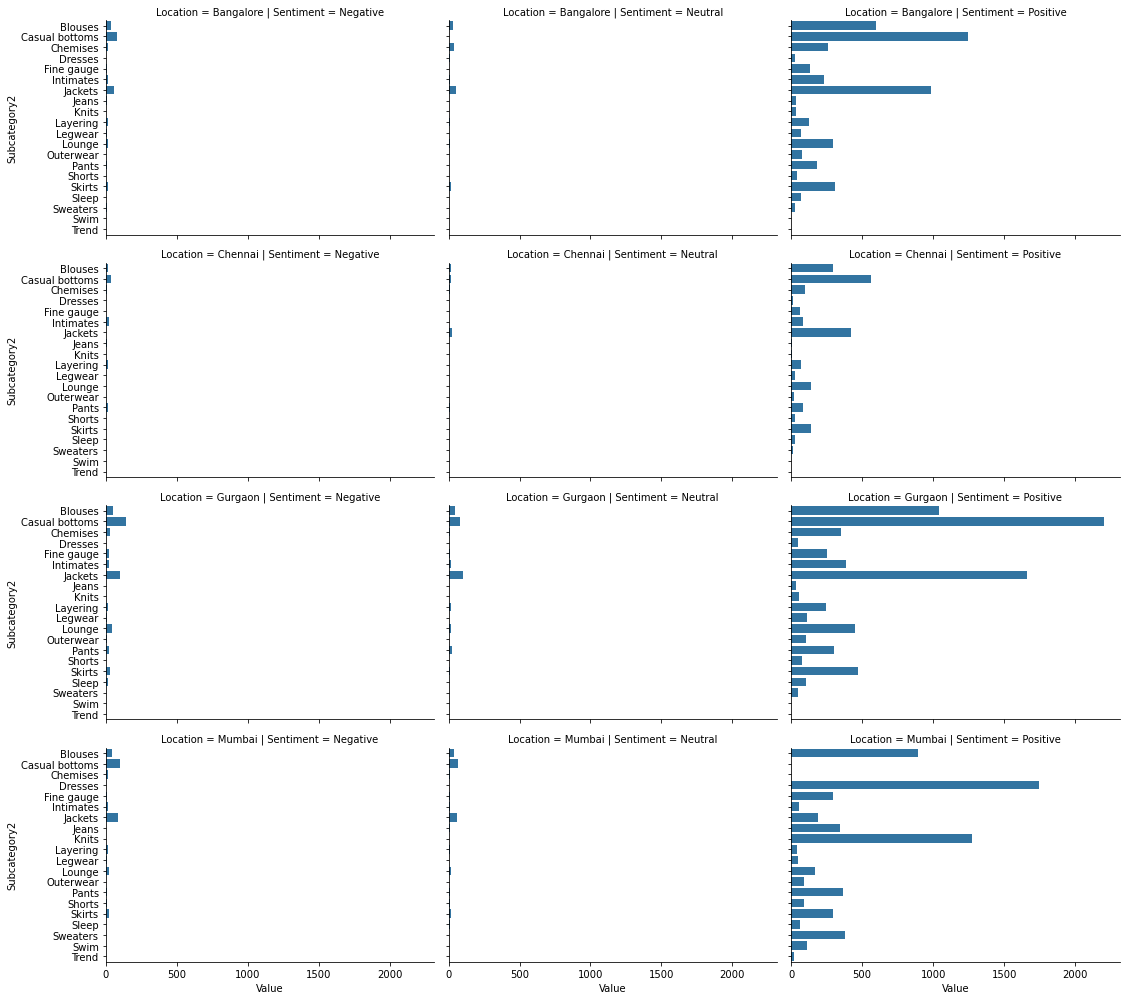

In [49]:
# using sns.Facetgrid

plt.figure(figsize = (15,10))
g = sns.FacetGrid(df, col = 'Sentiment', row = 'Location', height=3.5, aspect=1.5)
g.map(sns.barplot, 'Value','Subcategory2', ci = None)
plt.show()

In [50]:
pd.set_option('display.max_rows', None)
summary = df.pivot_table(index = ['Subcategory2','Location'], columns = 'Sentiment', values = 'Value')
summary = summary[['Negative','Neutral','Positive']].apply(lambda x : x / summary.sum(axis = 1)).round(3)*100
# summary = summary.iloc[:, 0:].apply(lambda x: x.div(x.sum()).mul(100), axis=1).astype(int)
summary['Total_Reviews'] = df.groupby(['Subcategory2','Location']).Value.sum()
summary.reset_index(inplace = True)
summary.head()

Sentiment    Subcategory2   Location  Negative  Neutral  Positive  \
0                 Blouses  Bangalore       5.1      4.7      90.2   
1                 Blouses    Chennai       5.0      4.3      90.7   
2                 Blouses    Gurgaon       4.5      4.1      91.4   
3                 Blouses     Mumbai       4.6      3.7      91.7   
4          Casual bottoms  Bangalore       NaN    100.0       NaN   

Sentiment  Total_Reviews  
0                    664  
1                    322  
2                   1142  
3                    973  
4                      1

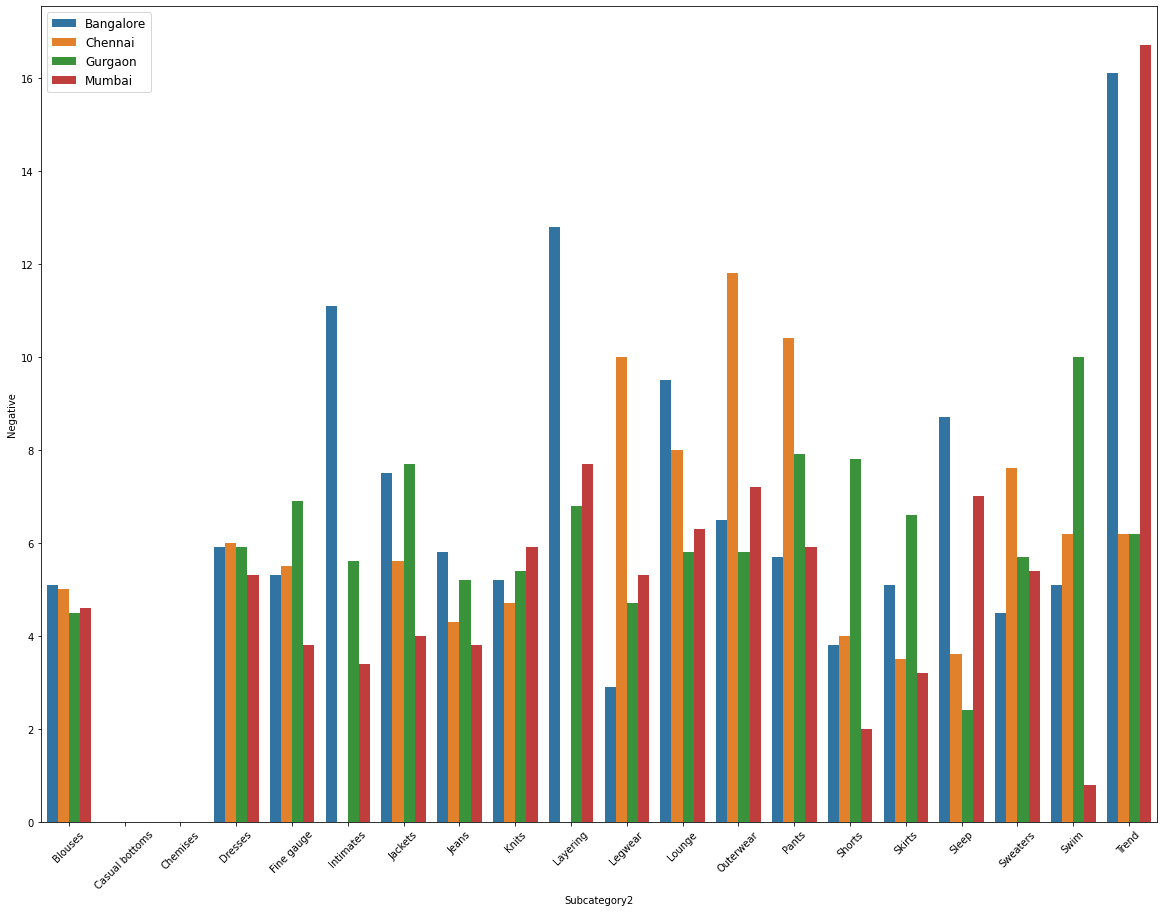

In [51]:
# plotting negative sentiment by location

plt.figure(figsize = (20,15))
sns.barplot(x = 'Subcategory2', y = 'Negative', hue = 'Location', data = summary)
plt.xticks(rotation = '45', size = 'medium')
plt.legend(loc = 'upper left', fontsize = 'large')
plt.show()

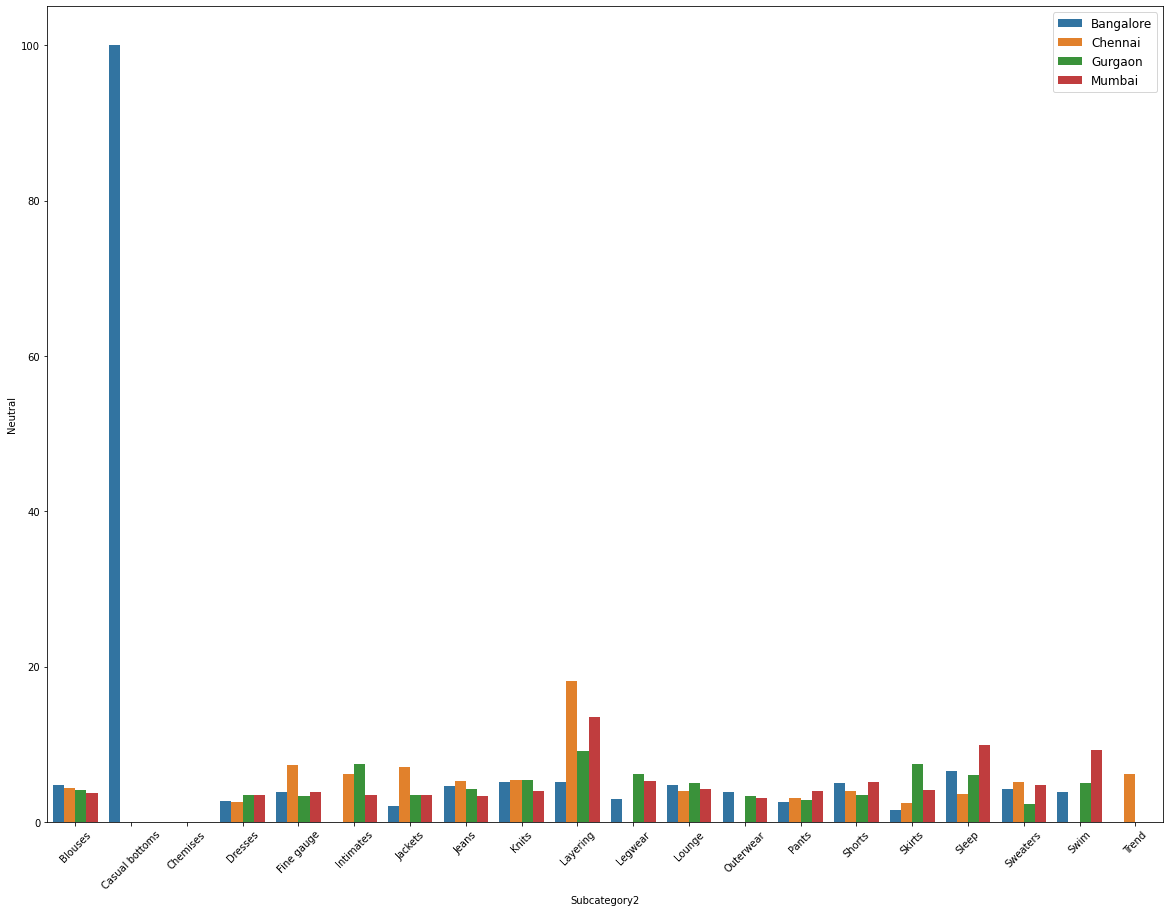

In [52]:
# plotting neutral sentiment by location

plt.figure(figsize = (20,15))
sns.barplot(x = 'Subcategory2', y = 'Neutral', hue = 'Location', data = summary)
plt.xticks(rotation = '45', size = 'medium')
plt.legend(loc = 'upper right', fontsize = 'large')
plt.show()

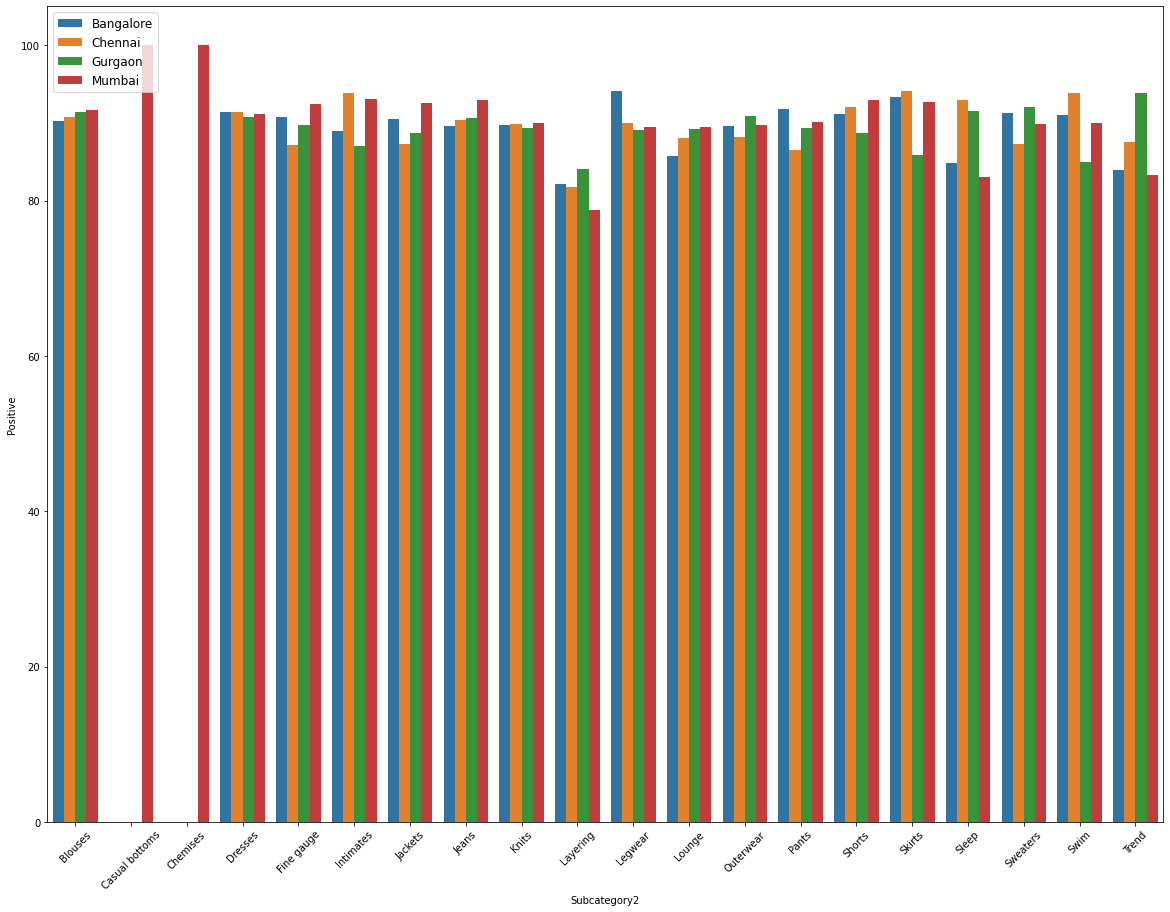

In [53]:
# plotting positive sentiment by location

plt.figure(figsize = (20,15))
sns.barplot(x = 'Subcategory2', y = 'Positive', hue = 'Location', data = summary)
plt.xticks(rotation = '45', size = 'medium')
plt.legend(loc = 'upper left', fontsize = 'large')
plt.show()

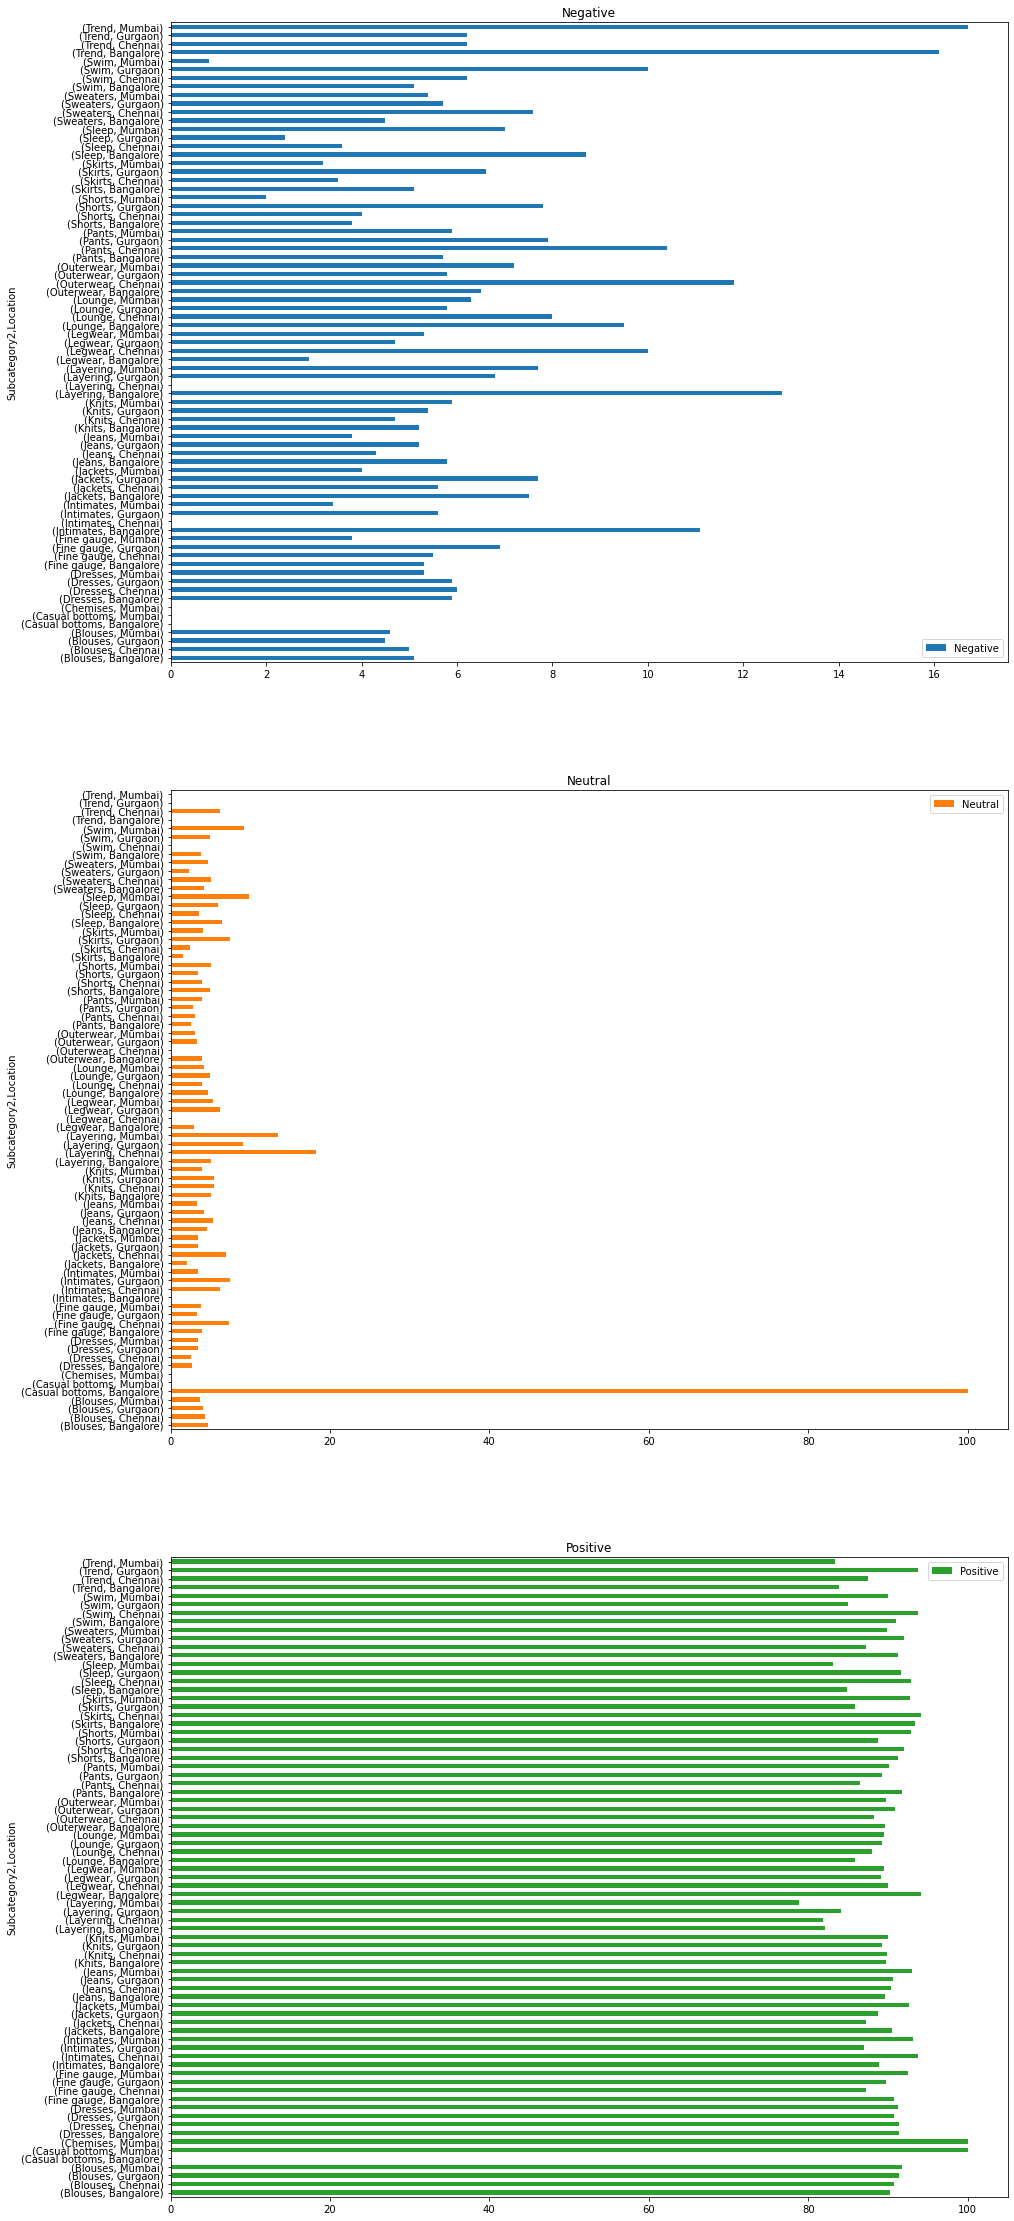

In [54]:
# another way of plotting the same graph

summary.set_index(['Subcategory2', 'Location'], inplace = True)
summary.plot(y = ['Negative','Neutral','Positive'], kind = 'barh', 
            figsize = (15,40), subplots = True, sharex = False)
plt.show()

### Sentiment among the customers on different categories by age

In [55]:
data['AgeGp'] = pd.cut(data.Age, bins = 5, retbins = True, labels = ['Till35', '35to50', '50to67', '67to83','82&Above'])[0]
data.head(2)

ProductID   Category Subcategory1 Subcategory2   Location Channel  Age  \
0        767  Initmates     Intimate    Intimates     Mumbai  Mobile   33   
1       1080    General      Dresses      Dresses  Bangalore  Mobile   34   

  Title                                             Review  Rating  Flag  \
0   NaN  Absolutely wonderful - silky and sexy and comf...       4     1   
1   NaN  Love this dress!  it's sooo pretty.  i happene...       5     1   

   Polarity_Score Sentiment   AgeGp  
0          0.6333  Positive  Till35  
1          0.3396  Positive  Till35

In [56]:
senti_by_age = data.groupby(['Subcategory1', 'AgeGp', 'Sentiment']).Sentiment.count()
senti_by_age = pd.DataFrame(senti_by_age)
senti_by_age.columns = ['Value']
senti_by_age = senti_by_age.reset_index()
senti_by_age.head(10)

Subcategory1   AgeGp Sentiment  Value
0      Bottoms  Till35  Negative     43
1      Bottoms  Till35   Neutral     43
2      Bottoms  Till35  Positive    859
3      Bottoms  35to50  Negative    114
4      Bottoms  35to50   Neutral     78
5      Bottoms  35to50  Positive   1678
6      Bottoms  50to67  Negative     52
7      Bottoms  50to67   Neutral     25
8      Bottoms  50to67  Positive    795
9      Bottoms  67to83  Negative      4

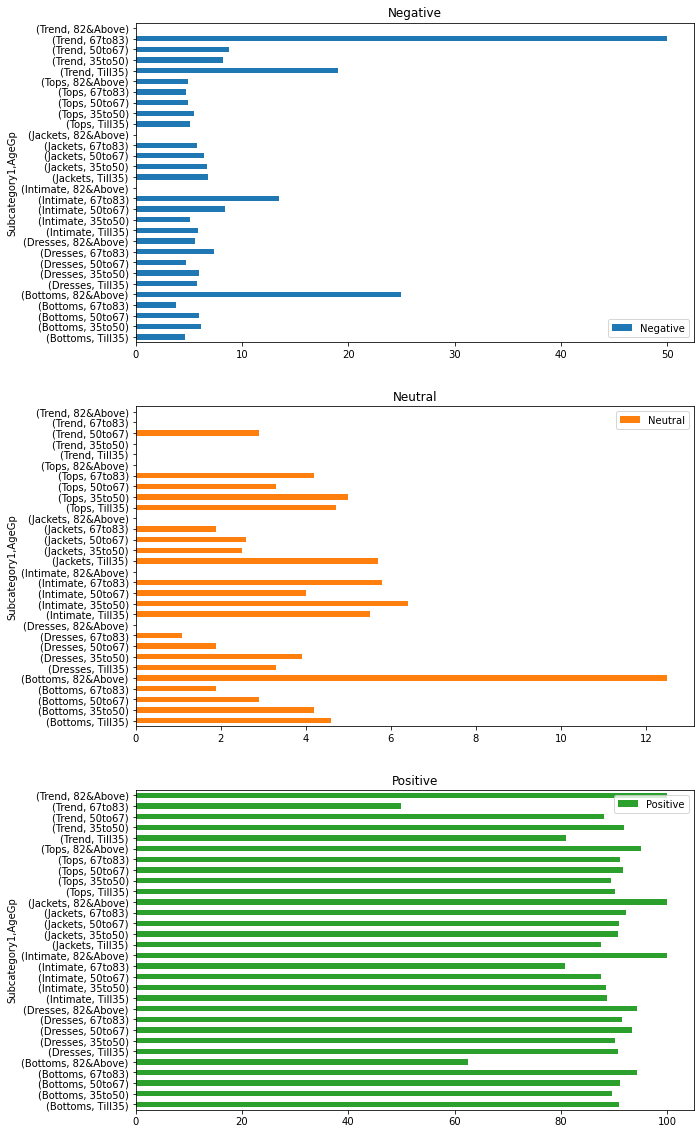

In [57]:
senti_by_age = senti_by_age.pivot(index = ['Subcategory1','AgeGp'], columns = 'Sentiment', values = 'Value')
senti_by_age = senti_by_age.apply(lambda x : x / senti_by_age.sum(axis = 1)).round(3) * 100
# senti_by_age = round(senti_by_age.div(senti_by_age.sum(axis = 1),axis = 0),3)*100

senti_by_age.plot(kind = 'barh', y = ['Negative', 'Neutral','Positive'], subplots = True, 
                  sharex = False, figsize = (10, 20))
plt.show()

### Sentiment among the customers on different categories by age and location

### Category

In [58]:
senti_by_age_loc = data.groupby(['Category', 'AgeGp', 'Location','Sentiment']).agg({'Sentiment':'count'})
senti_by_age_loc.columns = ['Value']
senti_by_age_loc = senti_by_age_loc.reset_index()
senti_by_age_loc.head()


# senti_by_age_loc = senti_by_age_loc.unstack() # convert the long table to wide table
# senti_by_age_loc.columns = senti_by_age_loc.columns.get_level_values(1) # remove multi-indexing

Category   AgeGp   Location Sentiment  Value
0  General  Till35  Bangalore  Negative     48
1  General  Till35  Bangalore   Neutral     31
2  General  Till35  Bangalore  Positive    735
3  General  Till35    Chennai  Negative     20
4  General  Till35    Chennai   Neutral     16

/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x720 with 0 Axes>

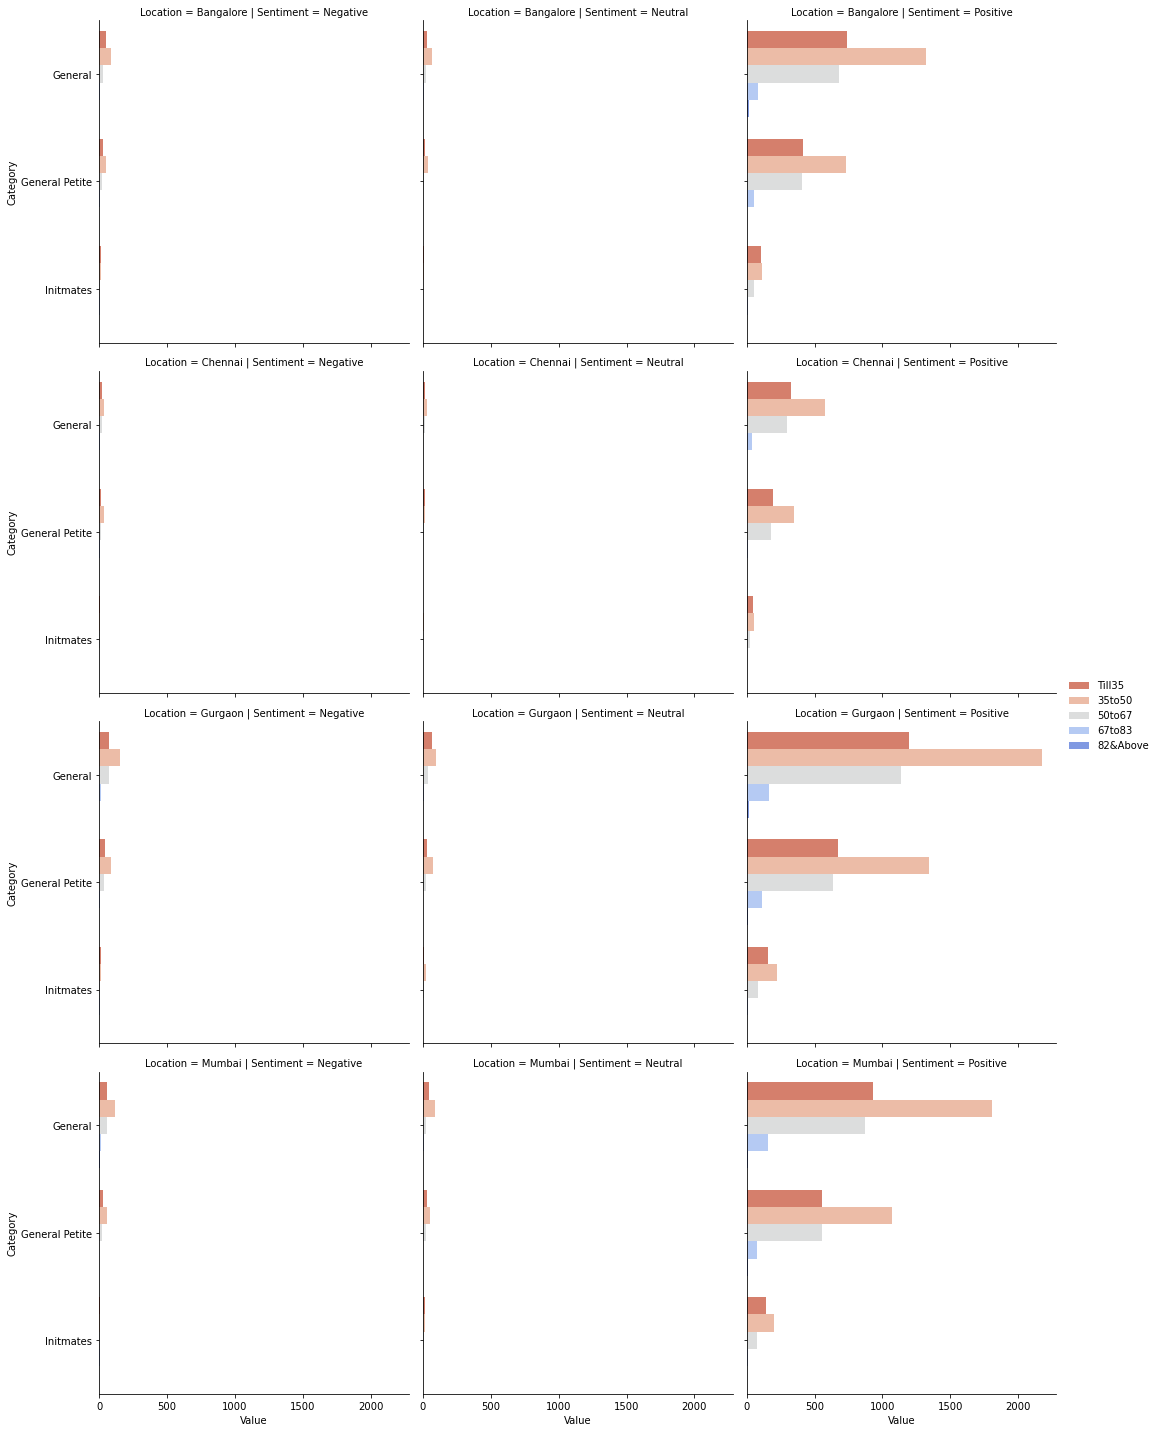

In [59]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(senti_by_age_loc, col = 'Sentiment', row = 'Location', height = 5, aspect = 1)
g.map(sns.barplot, 'Value','Category', 'AgeGp', 
                  palette = 'coolwarm_r', ci = None).add_legend()
plt.show()

General Petite has the maximum of positive reviews in all cities among all categories. Further, maximum positive reviews are being generated by customers from the age group 35To50. Majority of the positive reviews have been generated by the customers with age 67 and younger. 

### Sub-category1

In [60]:
senti_by_age_loc = data.groupby(['Subcategory1', 'AgeGp', 'Location','Sentiment']).Sentiment.count()
senti_by_age_loc = pd.DataFrame(senti_by_age_loc)
senti_by_age_loc.columns = ['Value']
senti_by_age_loc = senti_by_age_loc.reset_index()
senti_by_age_loc.head(10)

Subcategory1   AgeGp   Location Sentiment  Value
0      Bottoms  Till35  Bangalore  Negative     13
1      Bottoms  Till35  Bangalore   Neutral      9
2      Bottoms  Till35  Bangalore  Positive    207
3      Bottoms  Till35    Chennai  Negative      4
4      Bottoms  Till35    Chennai   Neutral      3
5      Bottoms  Till35    Chennai  Positive     85
6      Bottoms  Till35    Gurgaon  Negative     16
7      Bottoms  Till35    Gurgaon   Neutral     18
8      Bottoms  Till35    Gurgaon  Positive    304
9      Bottoms  Till35     Mumbai  Negative     10

/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x720 with 0 Axes>

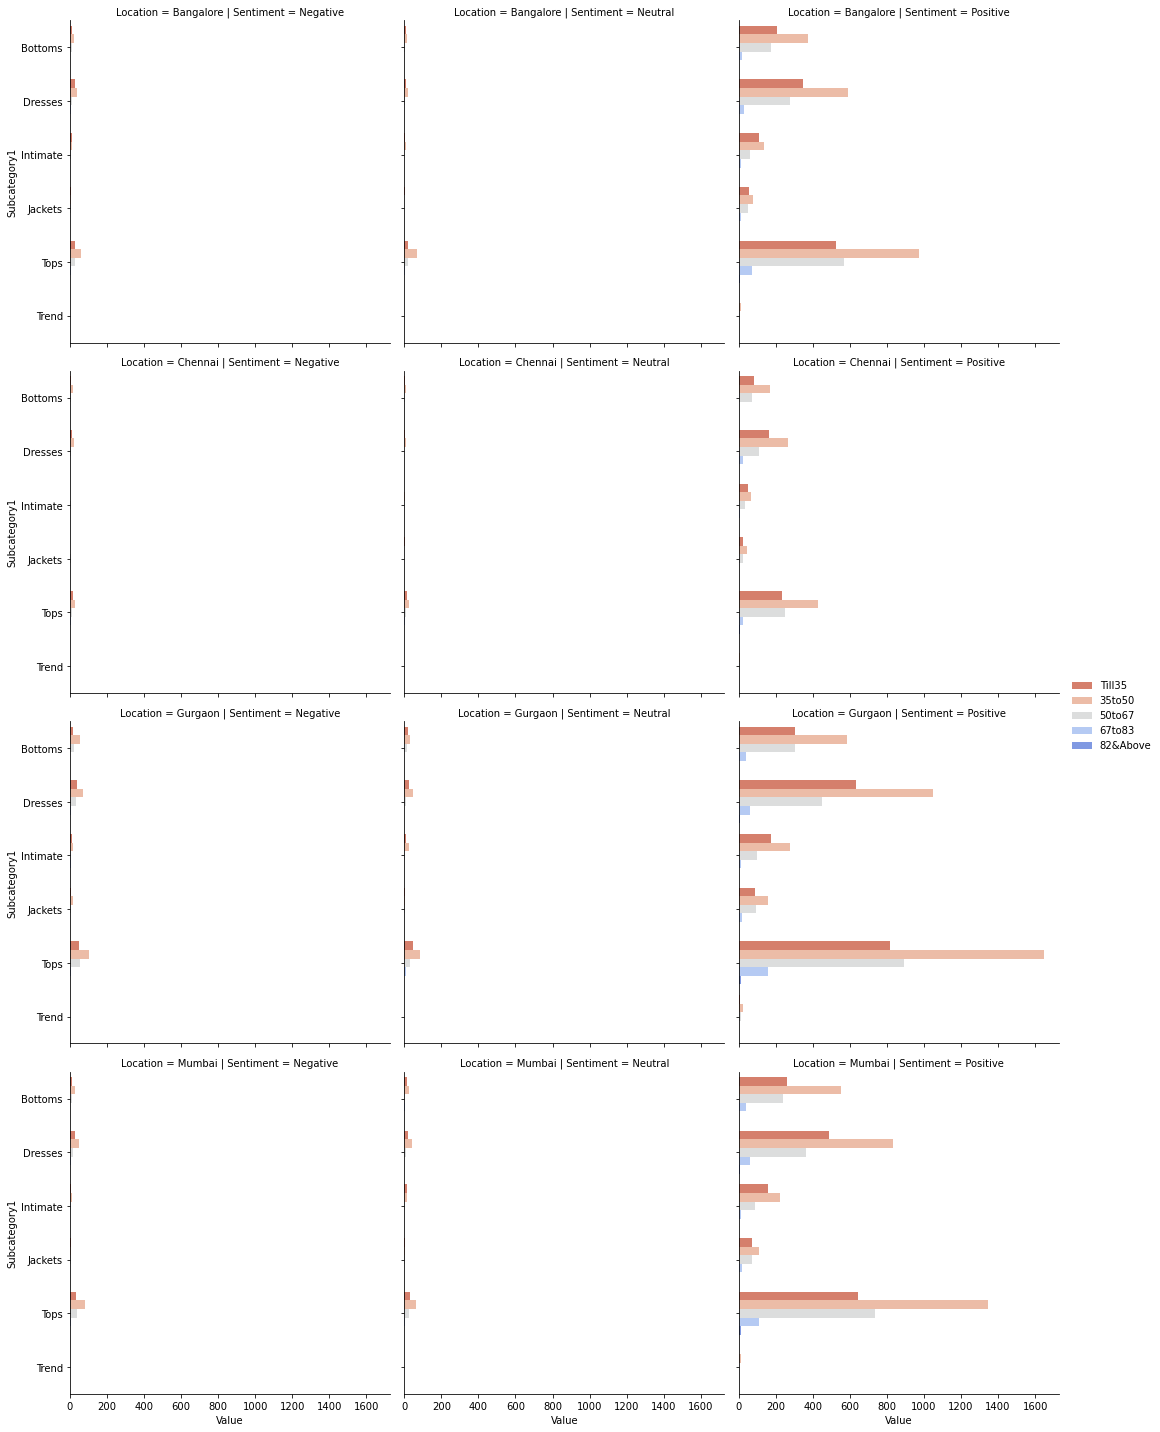

In [61]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(senti_by_age_loc, col = 'Sentiment', row = 'Location', height = 5, aspect = 1)
g.map(sns.barplot, 'Value','Subcategory1', 'AgeGp', 
                  palette = 'coolwarm_r', ci = None).add_legend()
plt.show()

### Sub-category2

In [62]:
senti_by_age_loc = data.groupby(['Subcategory2', 'AgeGp', 'Location','Sentiment']).Sentiment.count()
senti_by_age_loc = pd.DataFrame(senti_by_age_loc)
senti_by_age_loc.columns = ['Value']
senti_by_age_loc = senti_by_age_loc.reset_index()
senti_by_age_loc.head(10)

Subcategory2   AgeGp   Location Sentiment  Value
0      Blouses  Till35  Bangalore  Negative     11
1      Blouses  Till35  Bangalore   Neutral      5
2      Blouses  Till35  Bangalore  Positive    136
3      Blouses  Till35    Chennai  Negative      6
4      Blouses  Till35    Chennai   Neutral      3
5      Blouses  Till35    Chennai  Positive     69
6      Blouses  Till35    Gurgaon  Negative     11
7      Blouses  Till35    Gurgaon   Neutral     12
8      Blouses  Till35    Gurgaon  Positive    230
9      Blouses  Till35     Mumbai  Negative     12

/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x720 with 0 Axes>

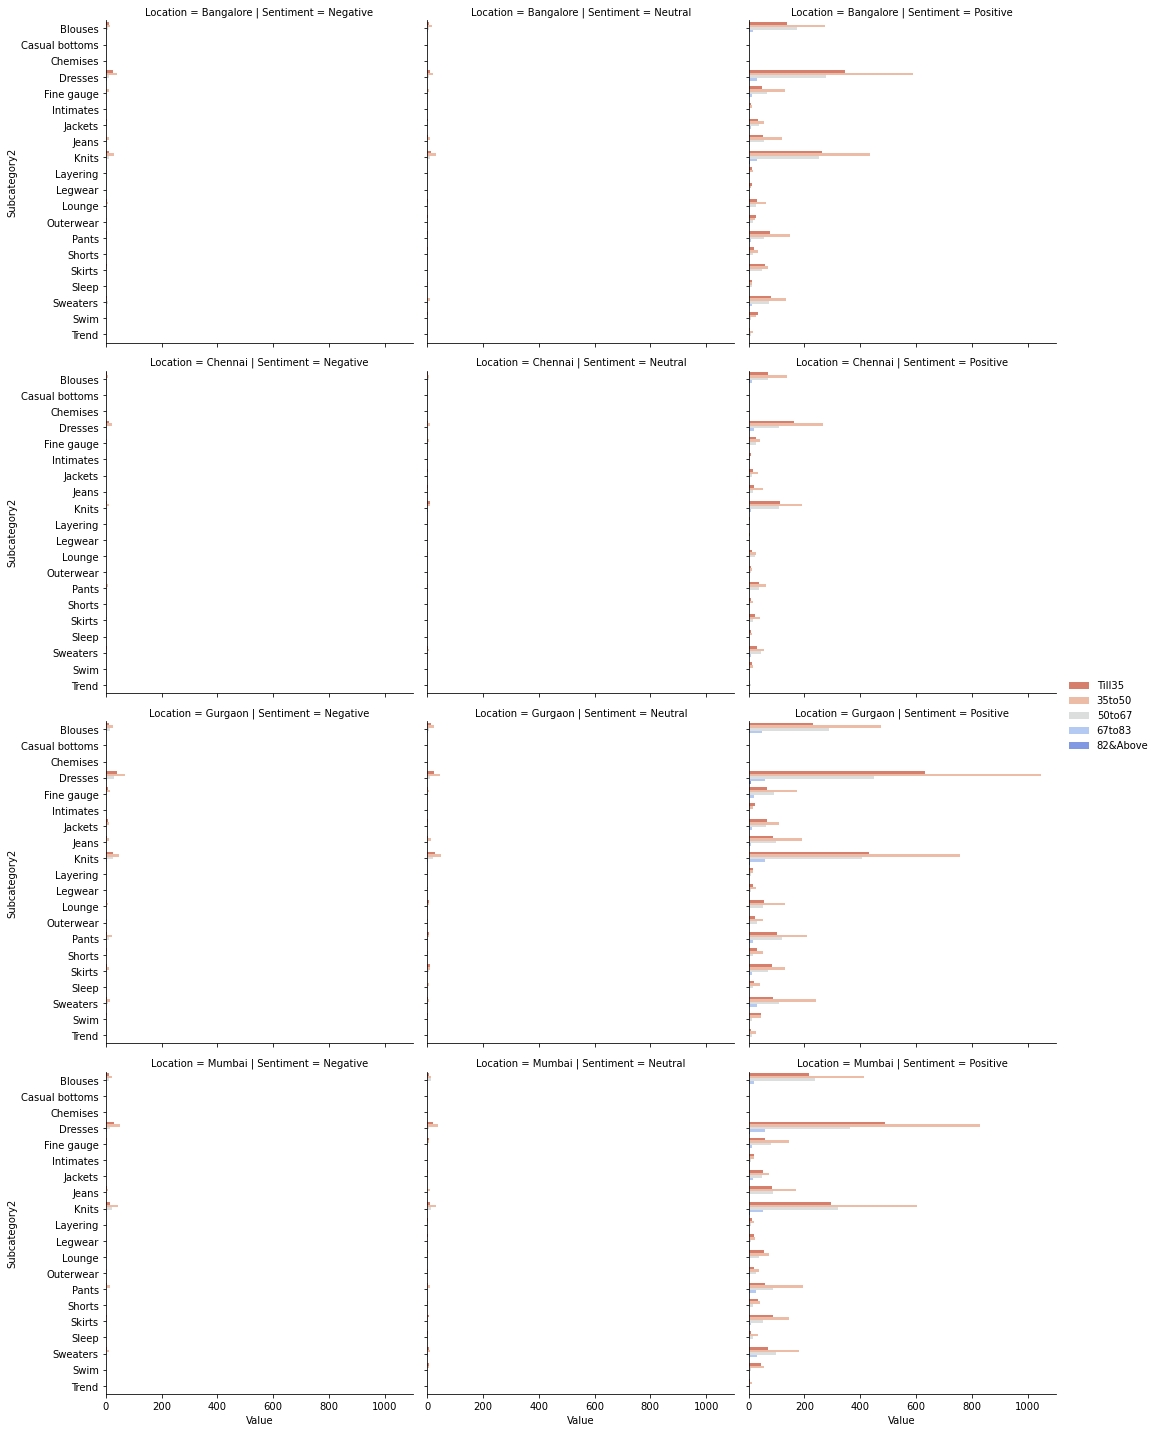

In [63]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(senti_by_age_loc, col = 'Sentiment', row = 'Location', height = 5, aspect = 1)
g.map(sns.barplot, 'Value','Subcategory2', 'AgeGp', 
                  palette = 'coolwarm_r', ci = None).add_legend()
plt.show()

## Perform predictive analysis to understand the drivers of the customers who are recommending the products

Prepare classification models for predicting which customers are recommending, also predicting rating based on the review.

In [64]:
data.head()

ProductID        Category Subcategory1 Subcategory2   Location Channel  \
0        767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1       1080         General      Dresses      Dresses  Bangalore  Mobile   
2       1077         General      Dresses      Dresses    Gurgaon  Mobile   
3       1049  General Petite      Bottoms        Pants    Chennai     Web   
4        847         General         Tops      Blouses  Bangalore     Web   

   Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                              Review  Rating  Flag  \
0  Absolutely wonderful - silky and sexy and comf...       4     1   
1  Love this dress!  it's sooo pretty.  i happene...       5     1   
2  I had such high hopes for this dress and reall...       3     0   
3  I love, love, love this jumpsuit. it's fun, fl...       5     1   
4  This shirt is very flattering to all due to th...       5     1   

   Polarity_Score Sentiment   AgeGp  
0          0.6333  Positive  Till35  
1          0.3396  Positive  Till35  
2          0.0737  Positive  50to67  
3          0.5500  Positive  35to50  
4          0.5129  Positive  35to50

In [65]:
recommend_products = data.loc[data.Flag == 1, :]
recommend_products.drop('Flag', axis = 1, inplace = True)
recommend_products.head()

ProductID        Category Subcategory1 Subcategory2   Location Channel  \
0        767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1       1080         General      Dresses      Dresses  Bangalore  Mobile   
3       1049  General Petite      Bottoms        Pants    Chennai     Web   
4        847         General         Tops      Blouses  Bangalore     Web   
6        858  General Petite         Tops        Knits    Gurgaon  Mobile   

   Age                 Title  \
0   33                   NaN   
1   34                   NaN   
3   50      My favorite buy!   
4   47      Flattering shirt   
6   39  Cagrcoal shimmer fun   

                                              Review  Rating  Polarity_Score  \
0  Absolutely wonderful - silky and sexy and comf...       4          0.6333   
1  Love this dress!  it's sooo pretty.  i happene...       5          0.3396   
3  I love, love, love this jumpsuit. it's fun, fl...       5          0.5500   
4  This shirt is very flattering to all due to th...       5          0.5129   
6  I aded this in my basket at hte last mintue to...       5          0.1338   

  Sentiment   AgeGp  
0  Positive  Till35  
1  Positive  Till35  
3  Positive  35to50  
4  Positive  35to50  
6  Positive  35to50

In [66]:
recommend_products.Category.value_counts().to_frame()

Category
General            11322
General Petite      6711
Initmates           1281

Products under general category are the ones most likely to be recommended by the customers. 

In [67]:
recommend_products.Subcategory1.value_counts()[:3].to_frame()

Subcategory1
Tops             8540
Dresses          5109
Bottoms          3236

Tops, Dresses and Bottoms are the ones which are recommended by the customers most of the times in subcategory1 of the products. 

In [68]:
recommend_products.Subcategory2.value_counts()[:3].to_frame()

Subcategory2
Dresses          5109
Knits            3962
Blouses          2513

Dresses, Knits and Blouses are the ones which are recommended by the customers most of the times in the subcategory2 of the products. 

In [69]:
round((recommend_products.AgeGp.value_counts() / recommend_products.shape[0])*100,2).to_frame()

AgeGp
35to50    46.89
Till35    25.44
50to67    23.85
67to83     3.43
82&Above   0.38

Among all the age groups, customers with age 67 and below contribute around 96% of the recommendations. Customers with age 35To50 are the highest recommenders. Customers with age group more than 67 mostly do not recommend the products. This may be because customers of these age groups may not be the target audience for the company. Further, the company can focus more on the services for the customers with age gp Till35 (a younger profile) and 50To67 (a more mature profile) to increase the likelihood of recommendations and increase in sales. 

In [70]:
recommend = pd.Series(recommend_products.Location.value_counts(), name = 'Recommended')
total_bought = pd.Series(data.Location.value_counts(), name = 'Total_Bought')
percent = pd.Series(round(recommend / total_bought, 2), name = 'Percentage')
pd.concat([total_bought, recommend, percent], axis = 1)

Total_Bought  Recommended  Percentage
Gurgaon            8821         7246        0.82
Mumbai             7112         5851        0.82
Bangalore          5224         4293        0.82
Chennai            2329         1924        0.83

Although the number of products sold in Chennai are least among all the cities,customers
in Chennai are slightly more likely to recommend the products. Rest all customers in balance cities are equally likely to recommend the products. 

As we come down-south (from Gurgaon to Chennai), the number of sales is decreasing

The company can engage customers in Chennai more with better services and products to increase sales since this city has marginally better likelihood of recommendations. 

In [71]:
data.Flag.value_counts().to_frame()

Flag
1  19314
0   4172

In [72]:
recommend_products.Sentiment.value_counts().to_frame()

Sentiment
Positive      17931
Neutral         840
Negative        543

Out of all products which have been recommended by the customers, maximum are with positive sentiment which is expected. However, there are products with negative and neutral sentiments also which have been recommended by the customers. One of the reason may

In [73]:
pd.set_option('display.max_rows', None)
data.loc[data.Sentiment == 'Negative', 'Review']

10       Dress runs small esp where the zipper area run...
14       This is a nice choice for holiday gatherings. ...
22       First of all, this is not pullover styling. th...
44       Tried this on today at my local retailer and h...
72       I have a short torso and this works well for m...
77       The zipper broke on this piece the first time ...
110      This is so thin and poor quality. especially f...
114      The design/shape of the dress are quite flatte...
157      So  disappointed that no where in the limiting...
180      Loved the green color, the cut is super flatte...
214      The skirt that i received had very little blue...
215      Ranna designs richly detailed dresses and this...
235      The blush stripes are subtle but they definite...
237      I have a similar pair of capris from retailer ...
260      I was hesitant to purchase this coat because o...
271      Per other reviewers, i sized up from a small t...
283      I want to live in this sweatshirt. it's so com.

### Creation of Predictive Model using Pipeline function of Python and by using review text content using NLP

In [74]:
# 1. By analysis of review text content using NLP

import string
from scipy import sparse
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,classification_report, confusion_matrix
from sklearn import neighbors
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,CategoricalNB,ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [75]:
data.Review.fillna('Blank Review', inplace = True)

In [76]:
def text_process(reviewText):
    reviewText = ' '.join(re.sub(r'[^a-zA-Z]',' ', reviewText).split())
    nopunc = [i for i in reviewText if i not in string.punctuation]
    nopunc_text = ''.join(nopunc)
    return [i for i in nopunc_text.split() if i.lower() not in stopwords.words('english')]

In [77]:
# Benchmark model - multinomial logistic regression
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))
])
X = data['Review']
y = data['Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
pipeline.fit(X_train, y_train)
pip_pred = pipeline.predict(X_test)
print(metrics.classification_report(y_test,pip_pred))

              precision    recall  f1-score   support

           0       0.75      0.52      0.61      1240
           1       0.90      0.96      0.93      5806

    accuracy                           0.89      7046
   macro avg       0.83      0.74      0.77      7046
weighted avg       0.88      0.89      0.88      7046



In [78]:
scores = cross_validate(pipeline, data['Review'], data['Flag'], cv = 5)
print(round(scores['test_score'].mean(),2))

0.89


In [79]:
# Get summary of the logistic regression model when using pipeline
pipeline.predict(X_train)

array([1, 1, 1, ..., 1, 1, 1])

Naive Bayes classifier for multinomial models

Multinomial Naive Bayes: Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [80]:
# First model try - Multinomial Naive bayes
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', MultinomialNB())
])
X = data['Review']
y = data['Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
pipeline.fit(X_train, y_train)
pip_pred = pipeline.predict(X_test)
print(metrics.classification_report(y_test,pip_pred))

              precision    recall  f1-score   support

           0       0.94      0.04      0.07      1240
           1       0.83      1.00      0.91      5806

    accuracy                           0.83      7046
   macro avg       0.88      0.52      0.49      7046
weighted avg       0.85      0.83      0.76      7046



In [81]:
scores = cross_validate(pipeline, data['Review'], data['Flag'], cv = 5)
print(round(scores['test_score'].mean(),2))

0.83


In [82]:
# DecisionTreeClassifier
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', DecisionTreeClassifier())
])
X = data['Review']
y = data['Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
pipeline.fit(X_train, y_train)
pip_pred = pipeline.predict(X_test)
print(metrics.classification_report(y_test,pip_pred))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48      1240
           1       0.89      0.89      0.89      5806

    accuracy                           0.82      7046
   macro avg       0.68      0.69      0.69      7046
weighted avg       0.82      0.82      0.82      7046



In [83]:
scores = cross_validate(pipeline, data['Review'], data['Flag'], cv = 5)
print(round(scores['test_score'].mean(),2))

0.81


In [84]:
# RandomForest
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', RandomForestClassifier())
])
X = data['Review']
y = data['Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
pipeline.fit(X_train, y_train)
pip_pred = pipeline.predict(X_test)
print(metrics.classification_report(y_test,pip_pred))

              precision    recall  f1-score   support

           0       0.83      0.21      0.33      1240
           1       0.85      0.99      0.92      5806

    accuracy                           0.85      7046
   macro avg       0.84      0.60      0.62      7046
weighted avg       0.85      0.85      0.81      7046



In [85]:
scores = cross_validate(pipeline, data['Review'], data['Flag'], cv = 5)
print(round(scores['test_score'].mean(),2))

0.85


## Using BagofWord (CountVectorizer) for Text Classification

In [86]:
stop = stopwords.words('english')
punc = string.punctuation
lemma = WordNetLemmatizer()

def clean_doc(doc):
    doc = doc.lower()
    # remove special characters and digits
    doc = re.sub("(\d|\W)+"," ",doc)
    # remove repetetion of characters in the words     
    pattern = re.compile(r'(.)\1{2,}', re.DOTALL)
    doc = pattern.sub(r'\1',doc)
    stop_free = ' '.join([word for word in word_tokenize(doc) if word not in stop])
    punc_free = ''.join([char for char in stop_free if char not in punc])
    cleaned_text = ' '.join([lemma.lemmatize(word) for word in word_tokenize(punc_free)])
    return cleaned_text

corpus = [clean_doc(doc) for doc in list(reviews)]

In [87]:
corpus[0]

'absolutely wonderful silky sexy comfortable'

In [88]:
# creating bag of words model
cv = CountVectorizer(max_features = 1500)

# cv.fit() will only create the vocabulary while cv.fit_transform() will create vocabulary
# and return term-document matrix. With this each column represents word in the vocabulary
# while each row represents the document in our dataset where the each value represents the 
# word-count. There could be many columns with zero values if the word does not appear in
# dtm. That is why it will be a sparse matrix. 

X = cv.fit_transform(corpus).toarray()
y = data['Sentiment'].values

In [89]:
print(cv.get_feature_names())

['able', 'absolutely', 'accent', 'accentuates', 'accessory', 'accommodate', 'accurate', 'across', 'actual', 'actually', 'add', 'added', 'adding', 'addition', 'additional', 'adjust', 'adjustable', 'adorable', 'adore', 'advice', 'afraid', 'ag', 'age', 'ago', 'agree', 'ahead', 'air', 'airy', 'ala', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'alteration', 'altered', 'alternative', 'although', 'always', 'amazing', 'amazingly', 'amount', 'amp', 'ankle', 'another', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'appear', 'appearance', 'appeared', 'appears', 'appreciate', 'appropriate', 'area', 'arm', 'armhole', 'armpit', 'around', 'arrive', 'arrived', 'art', 'asked', 'asymmetrical', 'athletic', 'attached', 'attention', 'attractive', 'available', 'average', 'avoid', 'aware', 'away', 'awesome', 'awful', 'awhile', 'awkward', 'baby', 'back', 'background', 'bad', 'badly', 'bag', 'baggy', 'balance', 'band', 'barely', 'based', 'basic', 'basically', 'bathing', 'bc', 'beac

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.38      0.48      0.43       395
     Neutral       1.00      0.89      0.94       285
    Positive       0.96      0.95      0.96      6366

    accuracy                           0.92      7046
   macro avg       0.78      0.77      0.78      7046
weighted avg       0.93      0.92      0.93      7046



## Topic Mining using Latent Dirichlets Analysis model

Performing predictive analysis tasks including topic mining.

In [93]:
cleaned_reviews_lemma[:5]

['absolutely wonderful silky sexy comfortable',
 'love dress pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt']

In [94]:
import gensim
from gensim import corpora

In [95]:
# creating dictionary of index where every unique word is given an index number

unicode_tokens = [word_tokenize(doc) for doc in cleaned_reviews_lemma]

dictionary = corpora.Dictionary(unicode_tokens)

In [96]:
# Convert `document` into the bag-of-words (BoW) format with count of each word in the 
# format list of `(token_id, token_count)` tuples.

bow = []

for doc in cleaned_reviews_lemma:
    tokens = word_tokenize(doc)
    bow.extend(tokens)

freq_count = [dictionary.doc2bow(bow)]

### Running LDA Model

Next step is to create an object for LDA model and train it on Document-Term matrix. The training also requires few parameters as input which are explained in Notes document.

The gensim module allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents.

In [97]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(freq_count, num_topics = 20, id2word = dictionary, passes=50)

In [98]:
print(ldamodel.print_topics(num_topics = 20, num_words = 1))

[(0, '0.000*"dress"'), (1, '0.019*"fit"'), (2, '0.000*"dress"'), (3, '0.000*"dress"'), (4, '0.000*"dress"'), (5, '0.000*"fit"'), (6, '0.000*"dress"'), (7, '0.000*"dress"'), (8, '0.000*"dress"'), (9, '0.000*"dress"'), (10, '0.000*"dress"'), (11, '0.000*"size"'), (12, '0.000*"dress"'), (13, '0.000*"size"'), (14, '0.000*"love"'), (15, '0.018*"dress"'), (16, '0.000*"dress"'), (17, '0.000*"dress"'), (18, '0.000*"love"'), (19, '0.000*"size"')]


Each line is a topic with terms and weights. Single words topics are Fit, Dress, Love, Top, Size

In [99]:
print(ldamodel.print_topics(num_topics = 20, num_words = 2))

[(0, '0.000*"dress" + 0.000*"size"'), (1, '0.019*"fit" + 0.017*"dress"'), (2, '0.000*"dress" + 0.000*"top"'), (3, '0.000*"dress" + 0.000*"size"'), (4, '0.000*"dress" + 0.000*"size"'), (5, '0.000*"fit" + 0.000*"love"'), (6, '0.000*"dress" + 0.000*"fit"'), (7, '0.000*"dress" + 0.000*"fit"'), (8, '0.000*"dress" + 0.000*"fit"'), (9, '0.000*"dress" + 0.000*"fit"'), (10, '0.000*"dress" + 0.000*"fit"'), (11, '0.000*"size" + 0.000*"dress"'), (12, '0.000*"dress" + 0.000*"love"'), (13, '0.000*"size" + 0.000*"fit"'), (14, '0.000*"love" + 0.000*"dress"'), (15, '0.018*"dress" + 0.015*"fit"'), (16, '0.000*"dress" + 0.000*"size"'), (17, '0.000*"dress" + 0.000*"fit"'), (18, '0.000*"love" + 0.000*"dress"'), (19, '0.000*"size" + 0.000*"dress"')]


In [100]:
print(ldamodel.print_topics(num_topics = 20, num_words = 3))

[(0, '0.000*"dress" + 0.000*"size" + 0.000*"fit"'), (1, '0.019*"fit" + 0.017*"dress" + 0.016*"top"'), (2, '0.000*"dress" + 0.000*"top" + 0.000*"fit"'), (3, '0.000*"dress" + 0.000*"size" + 0.000*"love"'), (4, '0.000*"dress" + 0.000*"size" + 0.000*"fit"'), (5, '0.000*"fit" + 0.000*"love" + 0.000*"dress"'), (6, '0.000*"dress" + 0.000*"fit" + 0.000*"love"'), (7, '0.000*"dress" + 0.000*"fit" + 0.000*"love"'), (8, '0.000*"dress" + 0.000*"fit" + 0.000*"like"'), (9, '0.000*"dress" + 0.000*"fit" + 0.000*"size"'), (10, '0.000*"dress" + 0.000*"fit" + 0.000*"top"'), (11, '0.000*"size" + 0.000*"dress" + 0.000*"top"'), (12, '0.000*"dress" + 0.000*"love" + 0.000*"fit"'), (13, '0.000*"size" + 0.000*"fit" + 0.000*"dress"'), (14, '0.000*"love" + 0.000*"dress" + 0.000*"fit"'), (15, '0.018*"dress" + 0.015*"fit" + 0.014*"size"'), (16, '0.000*"dress" + 0.000*"size" + 0.000*"fit"'), (17, '0.000*"dress" + 0.000*"fit" + 0.000*"love"'), (18, '0.000*"love" + 0.000*"dress" + 0.000*"size"'), (19, '0.000*"size" + 0

### Topic Mining using Tf-Idf

We will also combine titles with the review text for Topic Modelling

In [101]:
titles = [clean_doc(title) for title in list(data['Title'].fillna(''))]
combined_text = [i+' '+j for i,j in zip(titles, corpus)]
combined_text[4]

'flattering shirt shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt'

In [102]:
tfidf = TfidfVectorizer(use_idf = True, smooth_idf = True)
tf_idf_vector = tfidf.fit_transform(combined_text)

In [112]:
# the following lines of code are for viewing the tf_idf matrix. However, it is not 
# recommended to run this line of code since the data is very large and it will huge
# amount of time to complete this operation. 

# tf_idf_df = pd.DataFrame(data = tf_idf_vector.todense().round(2),
#                         columns = tfidf.get_feature_names())
# tf_idf_df

# instead get the feature-names along with tf-idf values as below:-

tf_idf_df = pd.DataFrame({
    'Feature':tfidf.get_feature_names(),
    'TF_IDF_Score':tfidf.idf_
})

tf_idf_df.sort_values(by = 'TF_IDF_Score', ascending = False, inplace = True)
tf_idf_df.reset_index(drop = True, inplace = True)
tf_idf_df

Feature  TF_IDF_Score
0                      lofty     10.371055
1                  memorable     10.371055
2                    merging     10.371055
3                   meredith     10.371055
4                       mere     10.371055
5                   merchant     10.371055
6               merchandised     10.371055
7                  mephistos     10.371055
8                   mentione     10.371055
9                      menti     10.371055
10                 mentality     10.371055
11                  mensware     10.371055
12                 menopause     10.371055
13                   mending     10.371055
14                   melting     10.371055
15                    merlot     10.371055
16                    melody     10.371055
17                   mellows     10.371055
18                  mellowed     10.371055
19                    melita     10.371055
20                    meleri     10.371055
21                   melange     10.371055
22                      mehh     10.371055
23                    meghan     10.371055
24                      meek     10.371055
25                    meduim     10.371055
26                    medora     10.371055
27                    medlum     10.371055
28                     merit     10.371055
29                     merry     10.371055
30                  narrowis     10.371055
31                    mighty     10.371055
32                 minimally     10.371055
33              minimalistic     10.371055
34                minimalism     10.371055
35                     mimic     10.371055
36                millimeter     10.371055
37                  milkmaid     10.371055
38                     miley     10.371055
39                 milestone     10.371055
40                   mildish     10.371055
41                     milan     10.371055
42                      mila     10.371055
43                      miid     10.371055
44                  mifnight     10.371055
45                mesmerized     10.371055
46                    miffed     10.371055
47                midwestern     10.371055
48                     midwe     10.371055
49                 midsummer     10.371055
50                   midrift     10.371055
51                     middi     10.371055
52                    midday     10.371055
53                microfiber     10.371055
54                  michelin     10.371055
55                       mia     10.371055
56                      meta     10.371055
57                   messing     10.371055
58                   mediumd     10.371055
59                     mediu     10.371055
60              mediterenian     10.371055
61                masquerade     10.371055
62                  matieral     10.371055
63                   mathced     10.371055
64                  matetial     10.371055
65              maternityish     10.371055
66                  maternit     10.371055
67                  materila     10.371055
68                   materil     10.371055
69                 materical     10.371055
70                   materal     10.371055
71                    matchy     10.371055
72                mastectomy     10.371055
73                  massaged     10.371055
74                   mashups     10.371055
75                  medieval     10.371055
76                   mashing     10.371055
77                   mashine     10.371055
78                    mashed     10.371055
79               marvilously     10.371055
80                   martini     10.371055
81                    martin     10.371055
82                    martie     10.371055
83                   martial     10.371055
84                 marsupial     10.371055
85                     marry     10.371055
86                   marroon     10.371055
87                    marred     10.371055
88                      matl     10.371055
89                    matted     10.371055
90                  mattered     10.371055
91                matterhorn     10.371055
92                 med

In [150]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key = lambda x: x[1], reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn):
    """get the feature names and tf-idf score of top n items"""
    
    # use only topn items from vector
    srtd_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in srtd_items:
        
        #keep track of feature name and its corresponding score
        
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
        
    #create a tuples of feature,score or you can create a dictionary of features and scores
    #results = zip(feature_vals,score_vals)
    
    results= {}
    for idx in range(topn):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [149]:
# convert the sparse matrix tf_idf_vector to coordinate format (ijv format where i is 
# the row value, j is the column value and v is the data point)

coo_mat = tf_idf_vector.tocoo()

#sort the tf-idf vectors by descending order of scores
sorted_items = sort_coo(tf_idf_vector.tocoo())
sorted_items[:5]

[(366, 0.9644414538681668),
 (9460, 0.9379803143784096),
 (3575, 0.9269567624143542),
 (366, 0.9110433557589672),
 (9126, 0.9033664002675894)]

In [154]:
cv = CountVectorizer(max_df = 0.85, stop_words = 'english', max_features = 20000)
word_count_vector = cv.fit_transform(combined_text)
feature_names = cv.get_feature_names()
len(feature_names)

# tfidf.get_feature_names()

12429

In [153]:
#extract top n keywords

keywords = extract_topn_from_vector(feature_names,sorted_items,20)

# now print the results

print("\n=====Doc=====")
print(doc)

print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


=====Doc=====
dress lovely platinum feminine fit perfectly easy wear comfy highly recommend

===Keywords===
anastasia 0.844
seriosu 0.938
enjoy 0.927
rregualr 0.903
said 0.888
deodorant 0.881
smidge 0.876
leading 0.875
crams 0.873
graduating 0.868
big 0.863
exclusively 0.858
texturing 0.849
madonna 0.847
cough 0.846
trepidation 0.843
predominantly 0.841
spirit 0.84


# FINISH